Importing Libraries

In [ ]:
#Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## All columns will be displayed when you print or view the DataFrame.
pd.set_option('display.max_columns',None)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

Importing Dataset

In [ ]:
#Load Dataset

#to mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#set path of datasets
df = pd.read_csv('/content/drive/MyDrive/Dataset folder/CVD_cleaned.csv')

df.head()
#We saw all the columns that we could not see on the site with the code we wrote

Mounted at /content/drive


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


Understanding Dataset

In [ ]:
df.shape

(308854, 19)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height_(cm),308854.0,170.615249,10.658026,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308854.0,83.588655,21.343210,24.95,68.04,81.65,95.25,293.02
BMI,308854.0,28.626211,6.522323,12.02,24.21,27.44,31.85,99.33
Alcohol_Consumption,308854.0,5.096366,8.199763,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308854.0,29.835200,24.875735,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308854.0,15.110441,14.926238,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308854.0,6.296616,8.582954,0.00,2.00,4.00,8.00,128.00


In [ ]:
df.describe(exclude='number').T

,count,unique,top,freq
General_Health,308854,5,Very Good,110395
Checkup,308854,5,Within the past year,239371
Exercise,308854,2,Yes,239381
Heart_Disease,308854,2,No,283883
Skin_Cancer,308854,2,No,278860
Other_Cancer,308854,2,No,278976
Depression,308854,2,No,246953
Diabetes,308854,4,No,259141
Arthritis,308854,2,No,207783
Sex,308854,2,Female,160196


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [ ]:
numeric = df.columns[df.dtypes != 'object']
category = df.columns[df.dtypes == 'object']

print('Numeric Attributes :',numeric)
print('Category Attributes :',category)

Numeric Attributes : Index(['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'],
      dtype='object')
Category Attributes : Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Smoking_History'],
      dtype='object')


# Analysing Data

## Univariate Analysis

<Axes: ylabel='Density'>

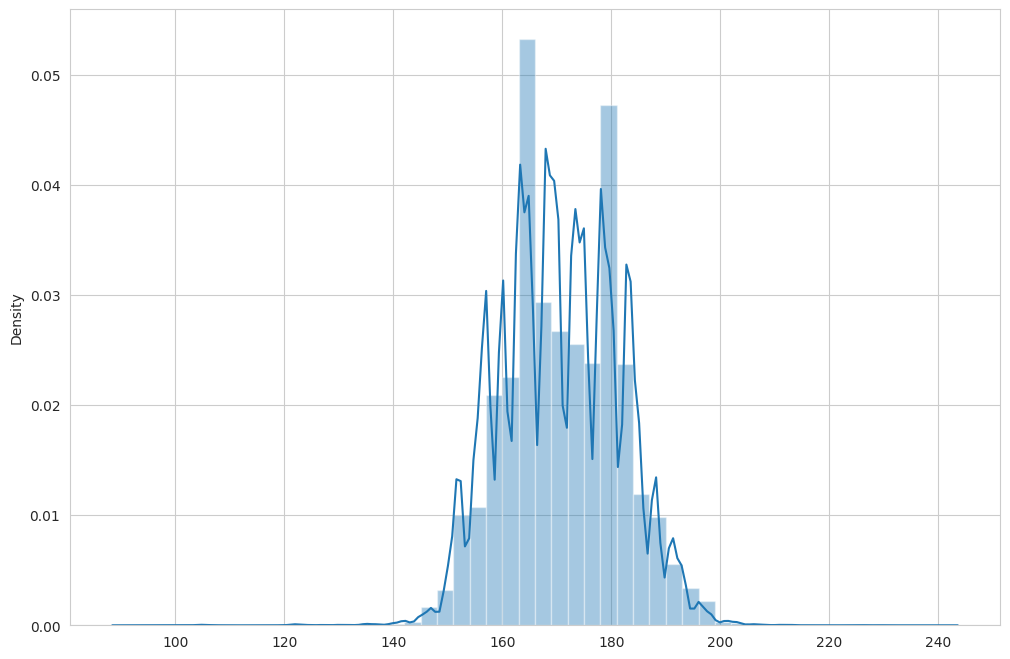

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(x = df['Height_(cm)'])

The data points before 140 and after 200 are working as outliers.

<Axes: ylabel='Density'>

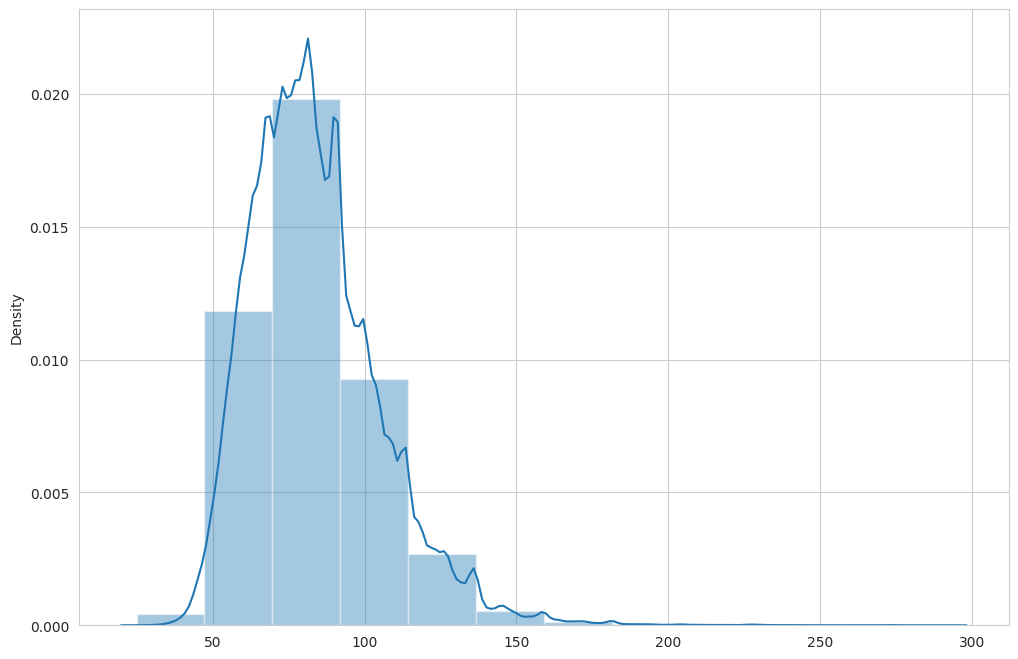

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(x = df['Weight_(kg)'], bins=12)

We can see through the chart that there are very few data points below a weight of 40 and above a weight of 170.

<Axes: ylabel='Density'>

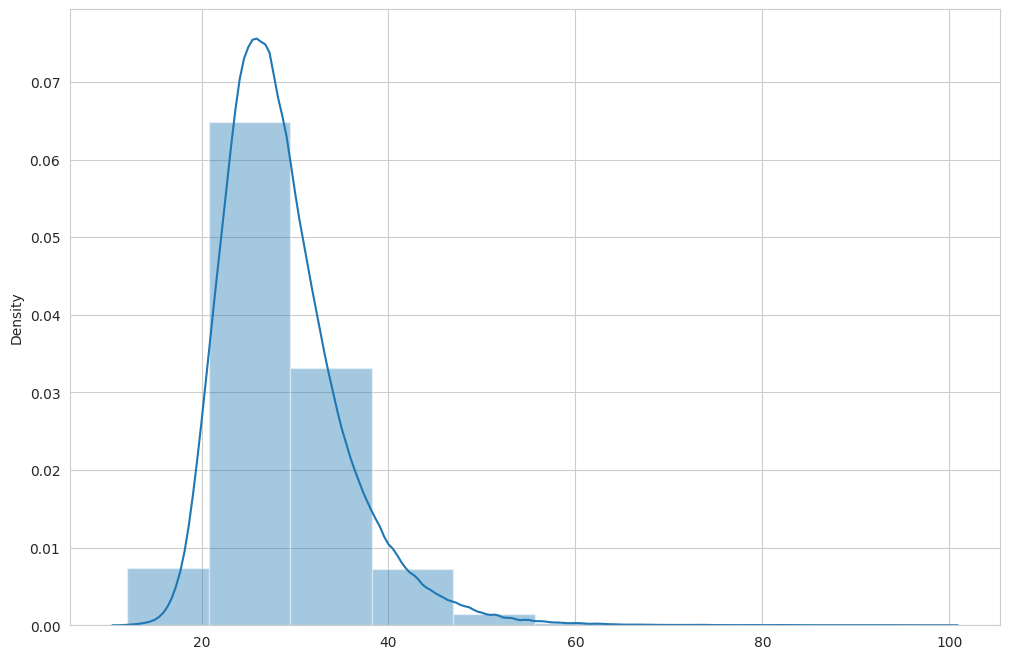

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(x = df['BMI'], bins = 10)

There is almost a flat line after 55–60. Hence, it can be said that the BMI after 60 can be treated as an outlier.

<Axes: ylabel='Density'>

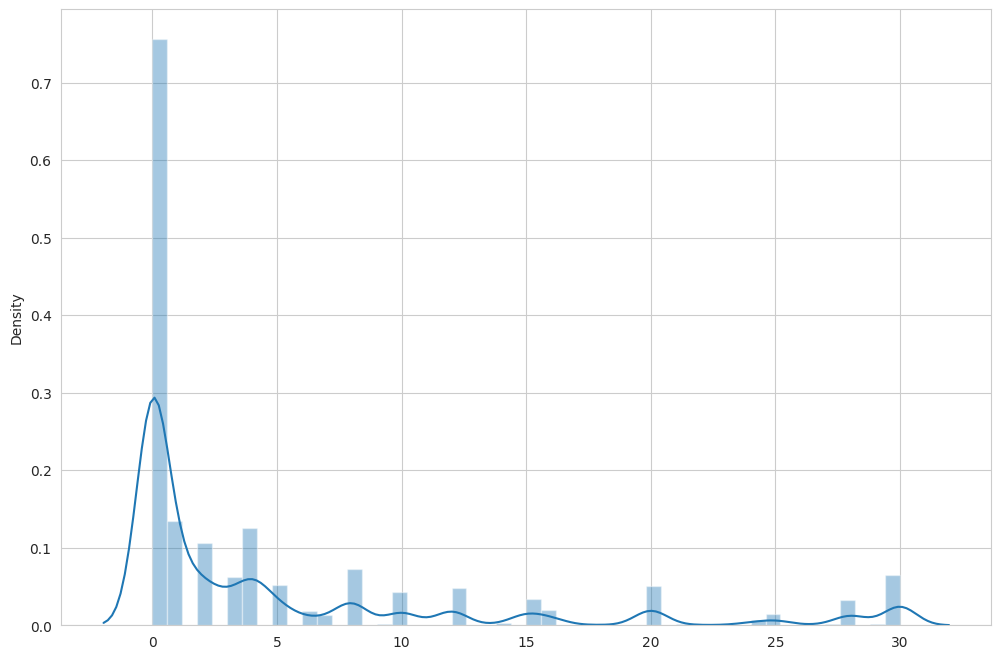

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(x = df['Alcohol_Consumption'])

<Axes: ylabel='Density'>

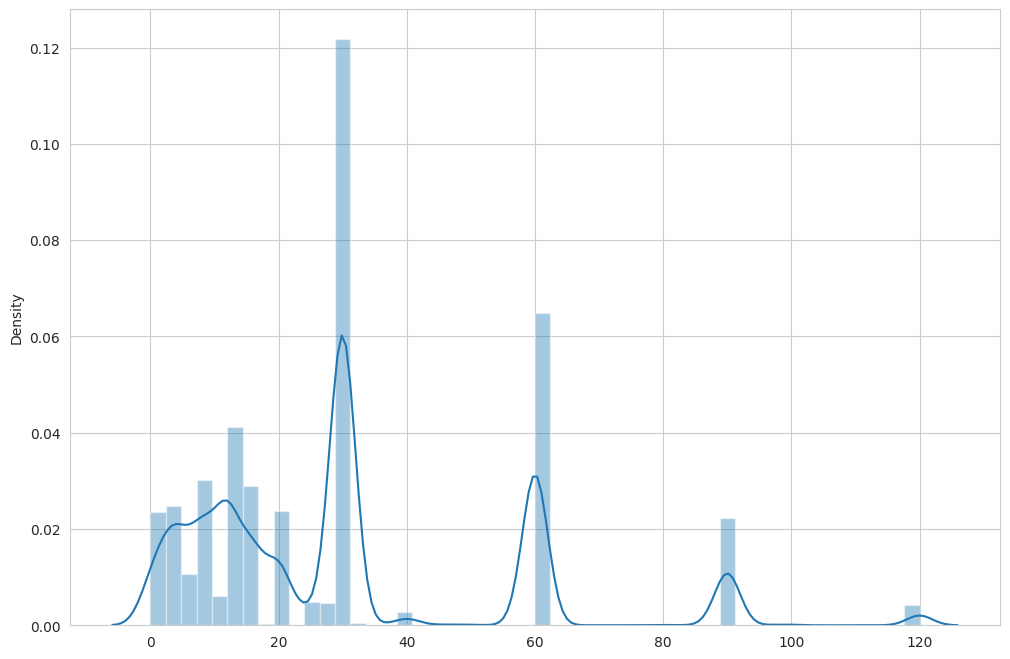

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(x = df['Fruit_Consumption'])

<Axes: ylabel='Density'>

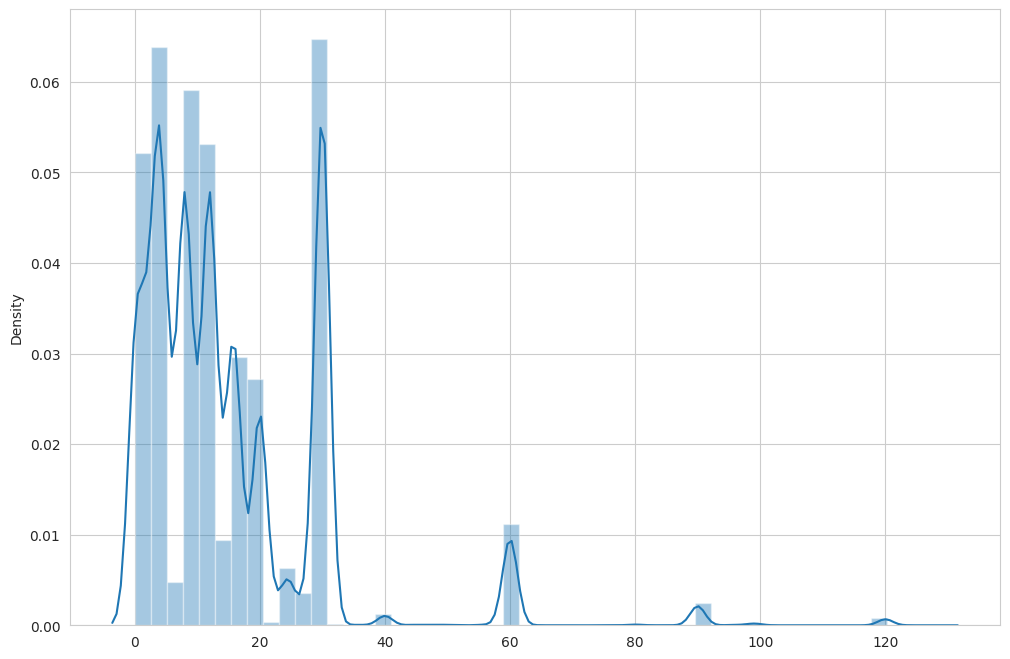

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(x = df['Green_Vegetables_Consumption'])

The chart shows that consumption of Green Vegetables is very low after 40, but at 60 there is a huge rise, and again after that, there is a flat line with a small rise at 90 and 120.

<Axes: ylabel='Density'>

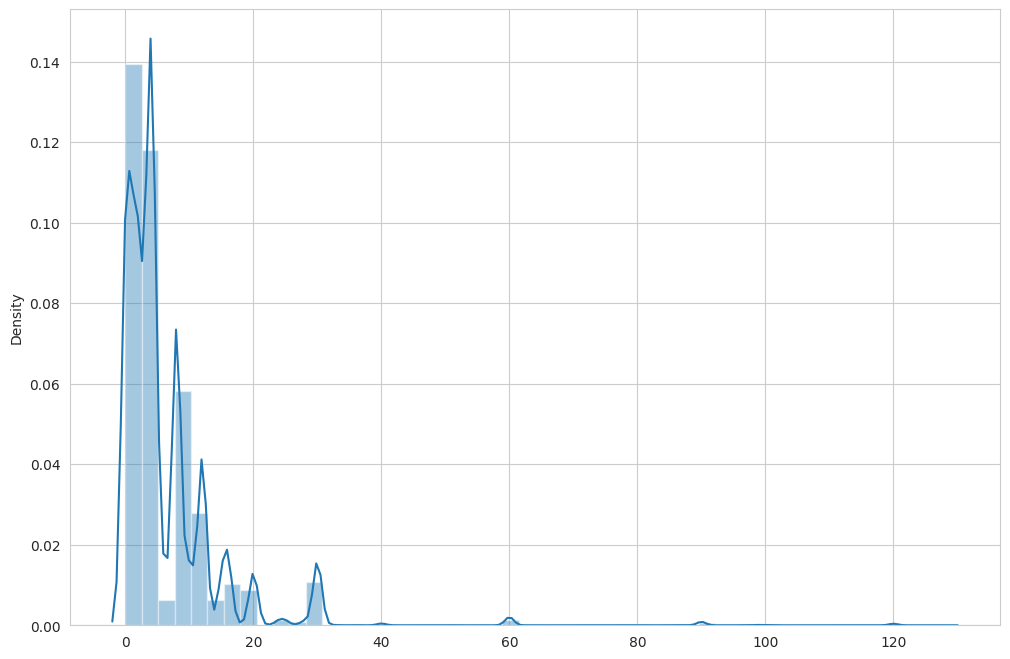

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(x = df['FriedPotato_Consumption'])

There is zero/very small consumption of Fried Potato after 30.

<Axes: xlabel='Green_Vegetables_Consumption', ylabel='Density'>

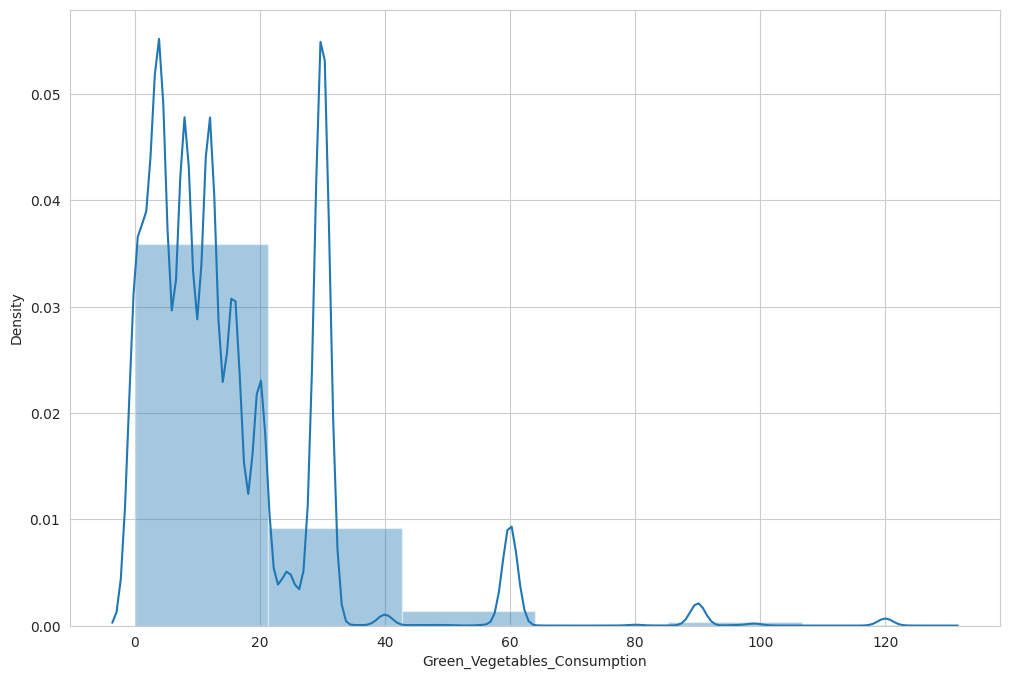

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(df['Green_Vegetables_Consumption'], bins = 6)

There is almost no consumption of green vegetables after 60.

<Axes: xlabel='General_Health', ylabel='count'>

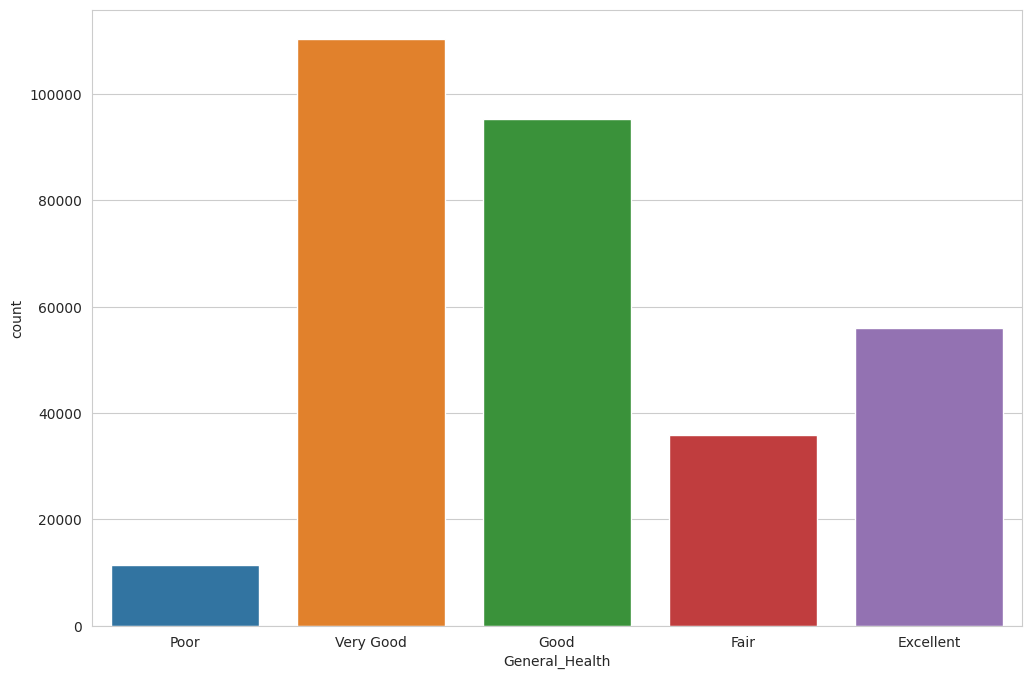

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x = df['General_Health'])

The general health of people is showing positive results, with only a minority of people having poor general health.


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Within the past 2 years'),
  Text(1, 0, 'Within the past year'),
  Text(2, 0, '5 or more years ago'),
  Text(3, 0, 'Within the past 5 years'),
  Text(4, 0, 'Never')])

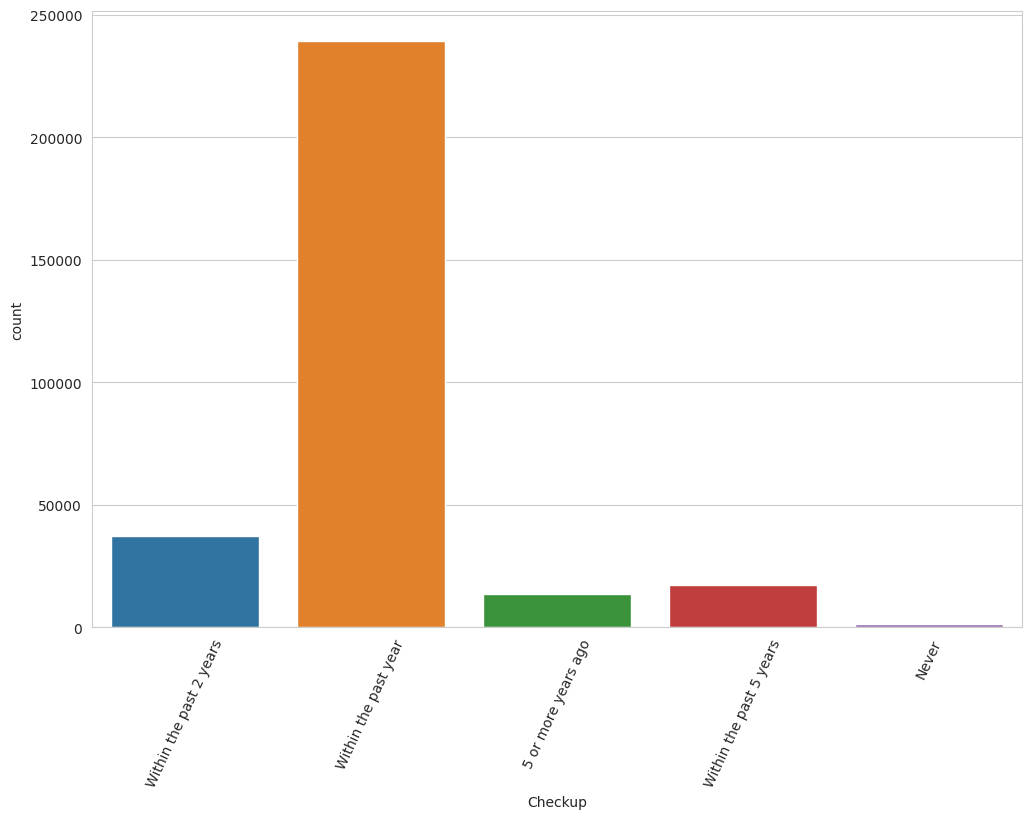

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x = df['Checkup'])
plt.xticks(rotation = 65)






The chart shows that it is a positive indicator, as people take their health seriously. Almost 80% of people took a health checkup last year.






<Axes: xlabel='Exercise', ylabel='count'>

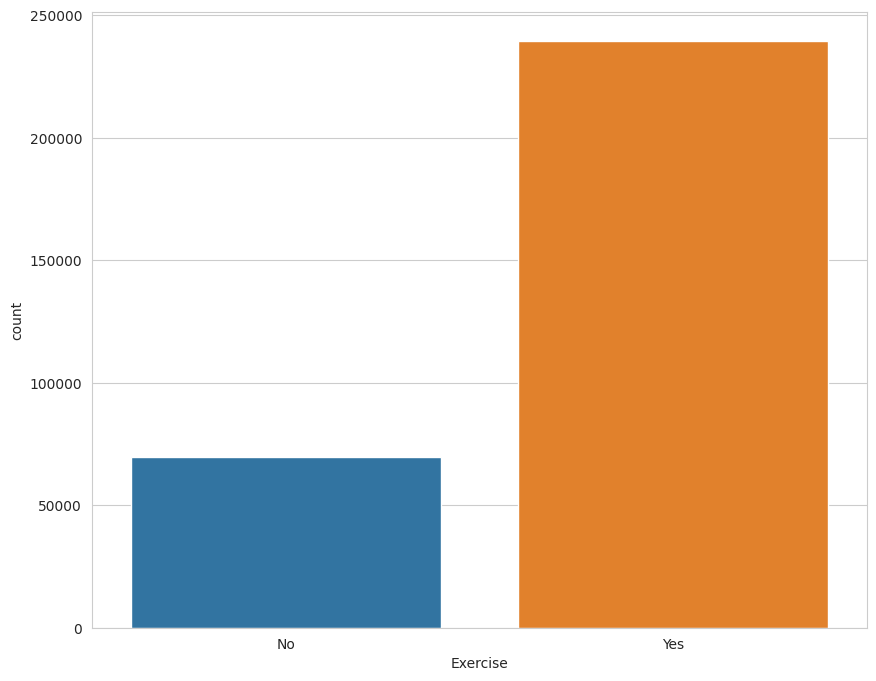

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(x = df['Exercise'])

80% of people exercise daily, which shows how much they want to be fit.

<Axes: xlabel='Heart_Disease', ylabel='count'>

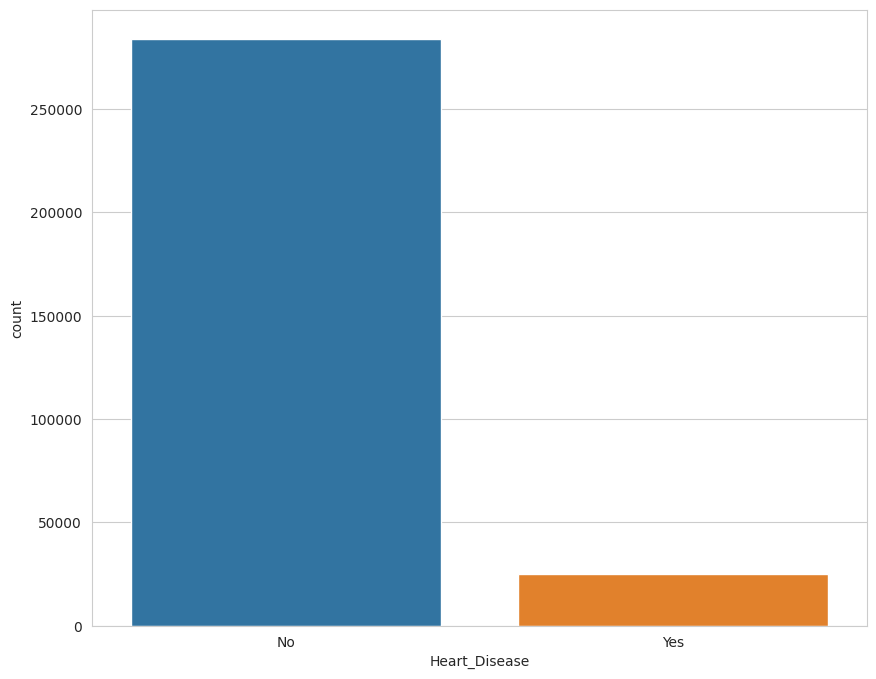

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(x = df['Heart_Disease'])


10% of people are facing heart disease.

<Axes: xlabel='Skin_Cancer', ylabel='count'>

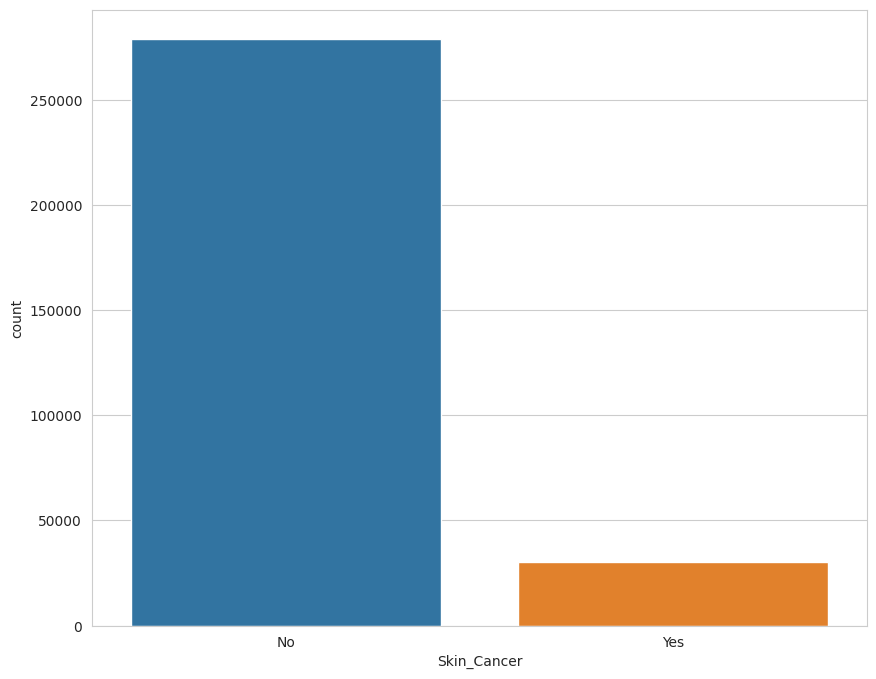

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(x=df['Skin_Cancer'])

Only 10% of people have skin cancer, which is very good.

<Axes: xlabel='Other_Cancer', ylabel='count'>

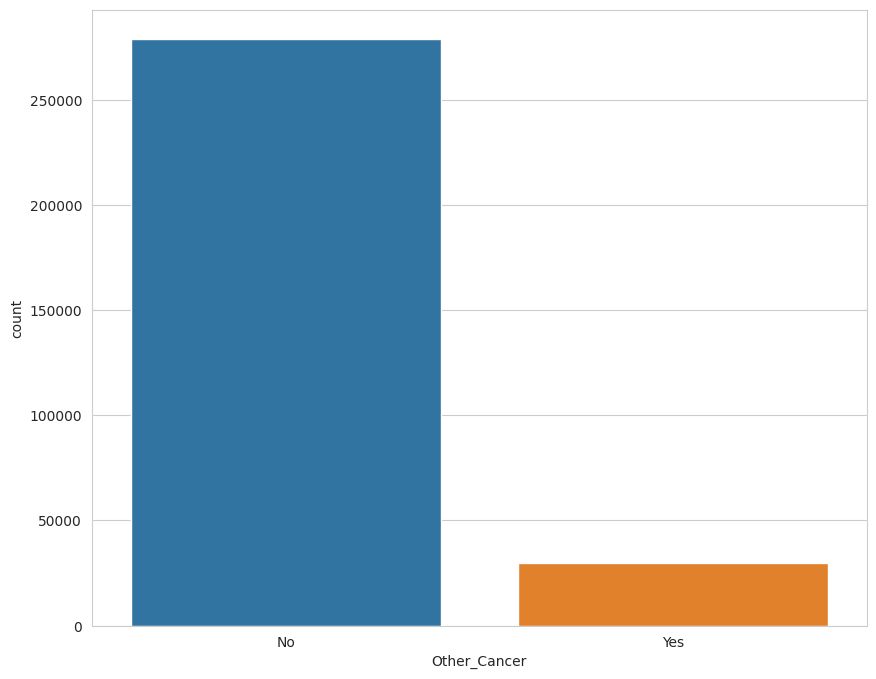

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(x=df['Other_Cancer'])

Only 10% of people are facing other types of cancer problems. The percentage is low, which is a good sign.

<Axes: xlabel='Depression', ylabel='count'>

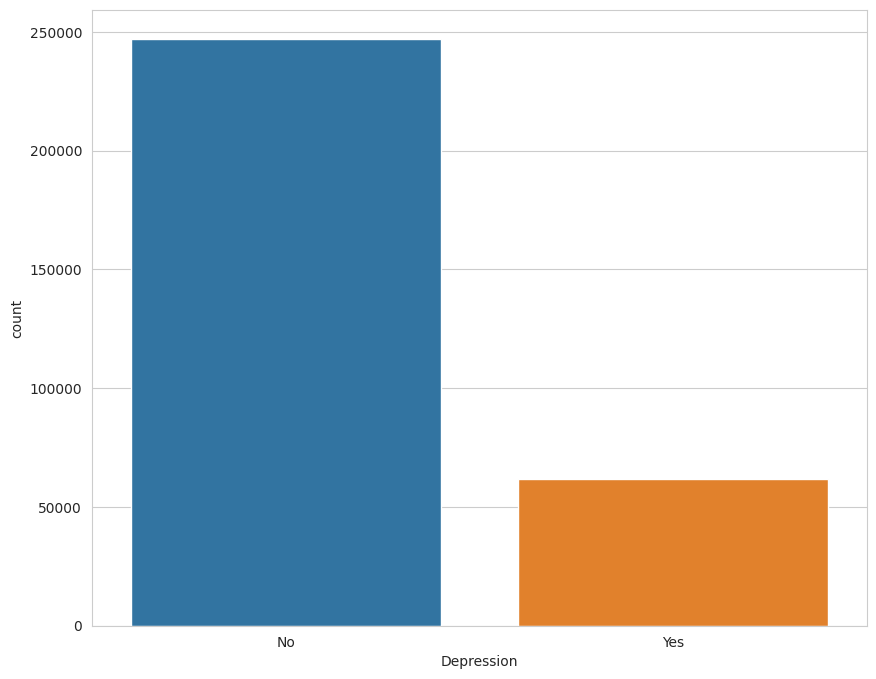

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(x=df['Depression'])

Almost 20% of people have depression, which is not a very bad sign, but it is not a very good sign either.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'No'),
  Text(1, 0, 'Yes'),
  Text(2, 0, 'No, pre-diabetes or borderline diabetes'),
  Text(3, 0, 'Yes, but female told only during pregnancy')])

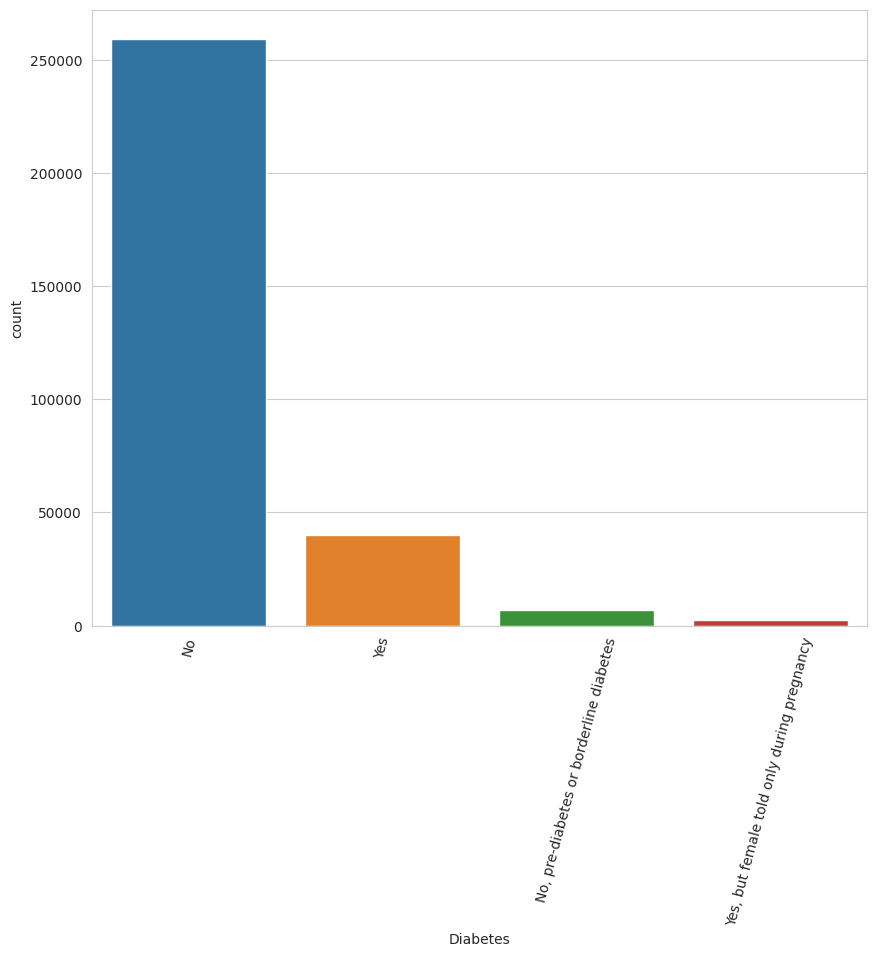

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(x = df['Diabetes'])
plt.xticks(rotation = 75)


Around 15% of people have diabetes, which is okay.


<Axes: xlabel='Arthritis', ylabel='count'>

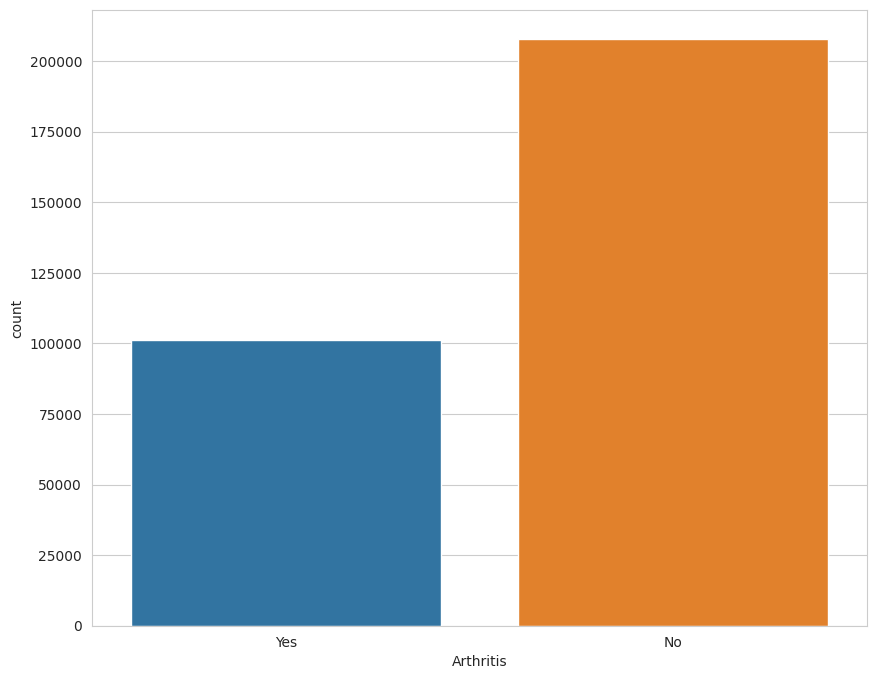

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(x = df['Arthritis'])




Even though 35% of people are facing arthritis, this is not a good sign. Age is another factor that causes this problem, which we might check later.




<Axes: xlabel='Sex', ylabel='count'>

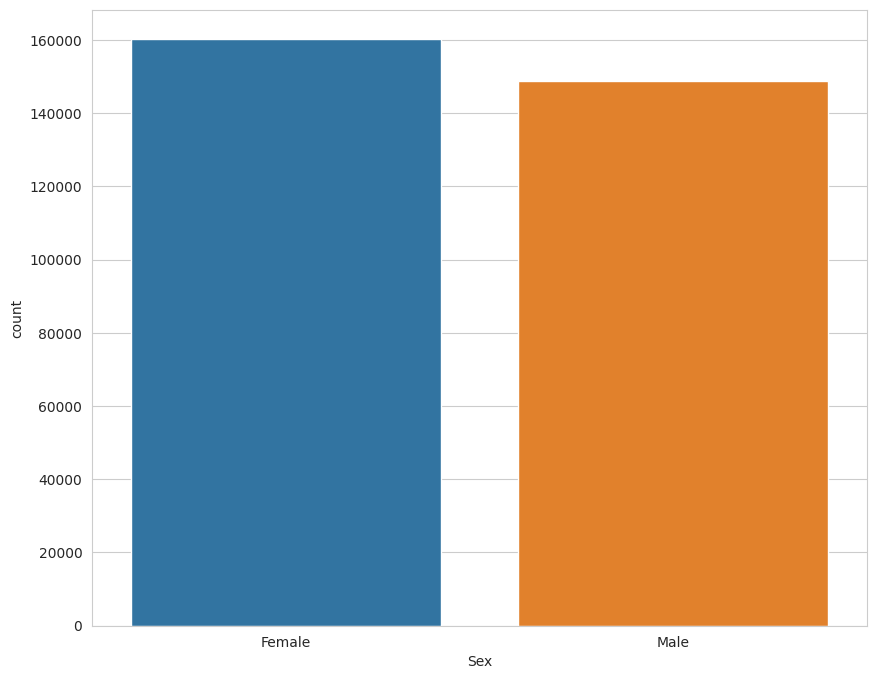

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(x = df['Sex'])

<Axes: xlabel='Age_Category', ylabel='count'>

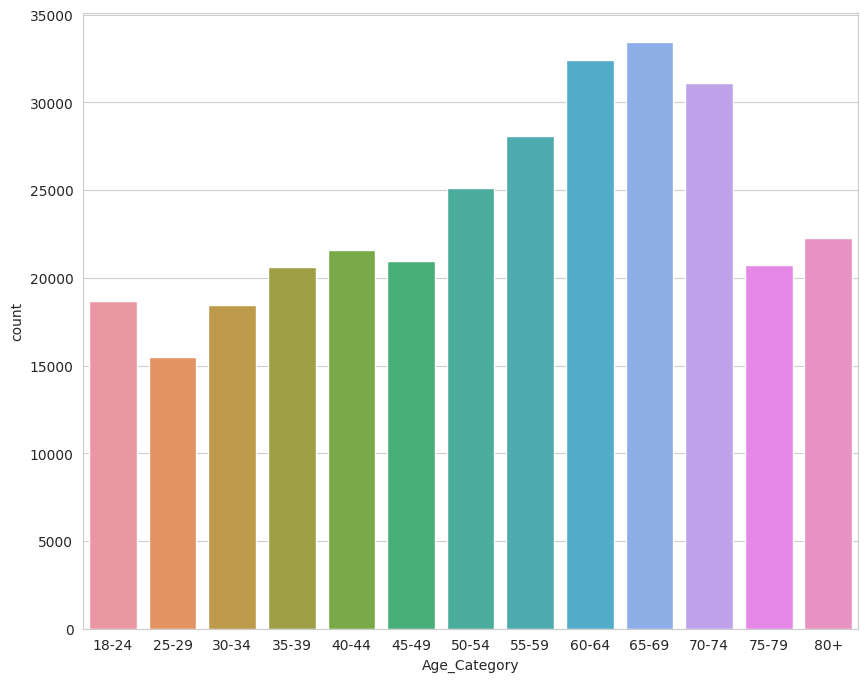

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(x = df['Age_Category'].sort_values())

There are all ages of people in this dataset, but the majority of them are between 50 and 74 years old.

<Axes: xlabel='Smoking_History', ylabel='count'>

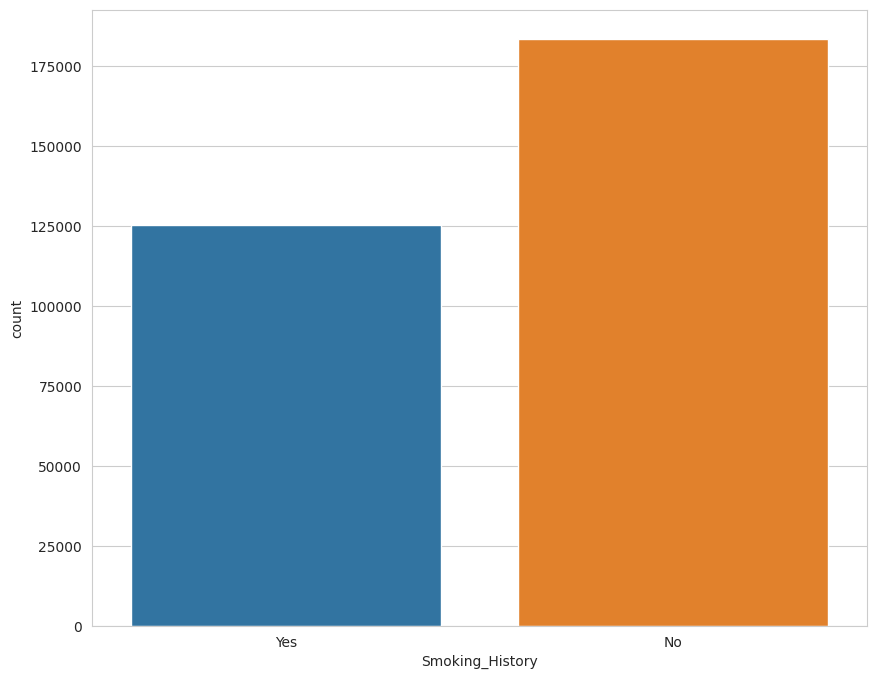

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(x = df['Smoking_History'])

Around 40% of people have a smoking history, which is not a good indicator for health.


## Bivariate Analysis

<Axes: xlabel='Heart_Disease', ylabel='Alcohol_Consumption'>

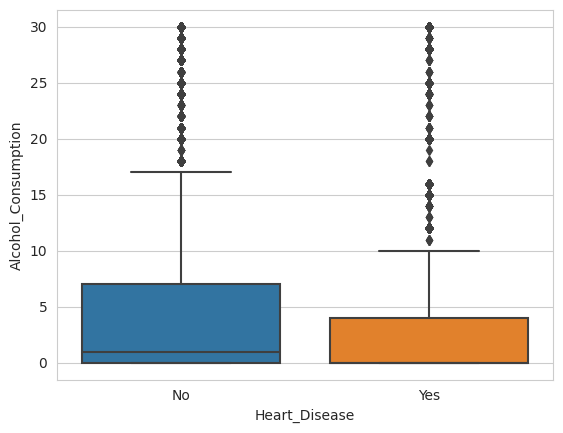

In [ ]:
sns.boxplot(x = df['Heart_Disease'], y = df['Alcohol_Consumption'])


<Axes: xlabel='Heart_Disease', ylabel='Fruit_Consumption'>

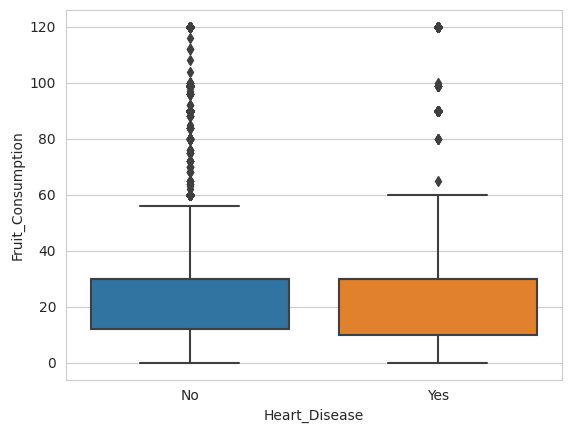

In [ ]:
sns.boxplot(x = df['Heart_Disease'], y = df['Fruit_Consumption'])


<Axes: xlabel='Heart_Disease', ylabel='Green_Vegetables_Consumption'>

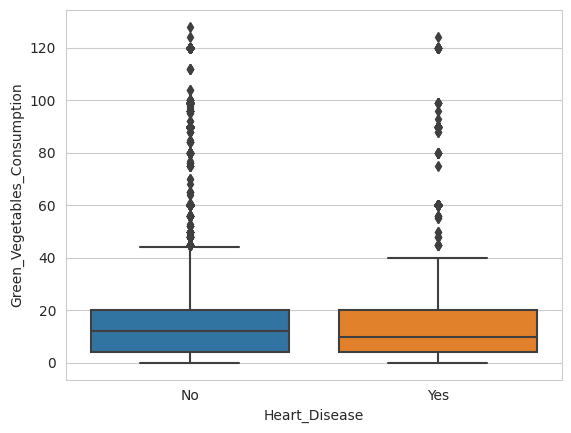

In [ ]:
sns.boxplot(x = df['Heart_Disease'], y = df['Green_Vegetables_Consumption'])

<Axes: xlabel='Heart_Disease', ylabel='FriedPotato_Consumption'>

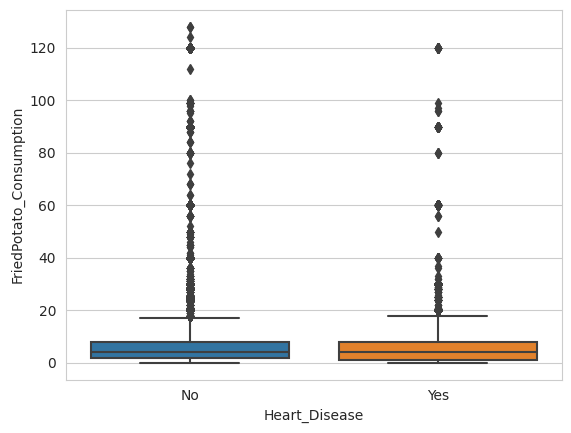

In [ ]:
sns.boxplot(x = df['Heart_Disease'], y = df['FriedPotato_Consumption'])

<Axes: xlabel='Heart_Disease', ylabel='count'>

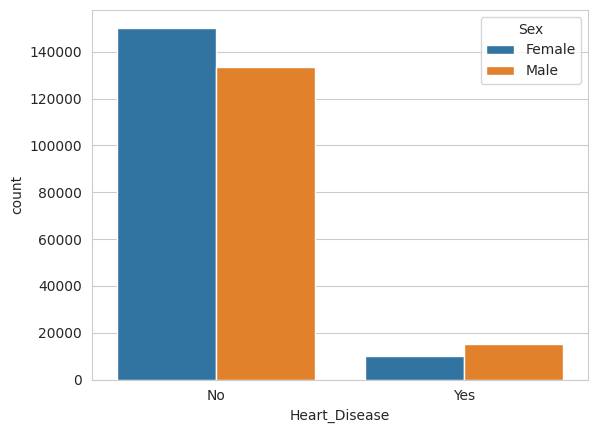

In [ ]:
sns.countplot(x = df['Heart_Disease'], hue = df['Sex'])

<Axes: xlabel='Age_Category', ylabel='count'>

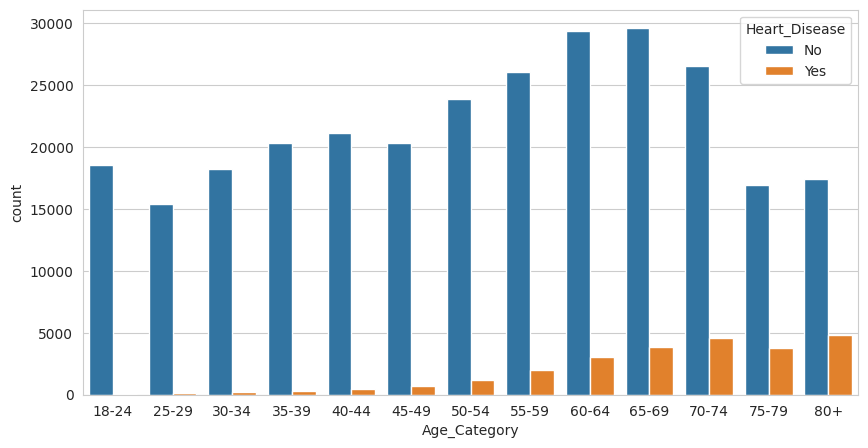

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['Age_Category'].sort_values(), hue = df['Heart_Disease'])

<Axes: xlabel='Smoking_History', ylabel='count'>

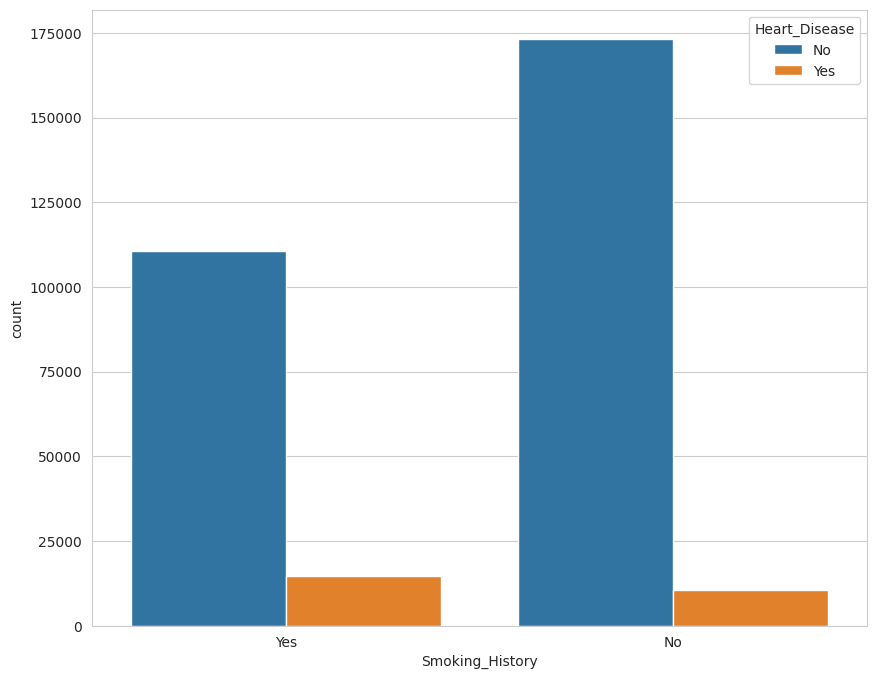

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(x = df['Smoking_History'], hue = df['Heart_Disease'])

People with less alcohol consumption have heart disease, which indicates a kind of inverse relationship between Alcohol Consumption and Heart Disease.

Fruit Consumption and Heart Disease do not show any kind of relationship; however, people with heart disease have a slightly higher level of fruit consumption.

People who have and do not have heart disease are equally balanced out, and both types of people consumed the same amount of fried potatoes, which could show that consumption of fried potatoes is not a significant factor in heart disease.

Out of the 10% of patients who have heart disease, 7% are males, which shows males face heart problems more than females.

There are more People after the age of 50 who have heart disease than those who are less than 50.

People with a smoking habit face more heart disease than those who don't smoke.

Height, weight, and BMI do not affect the risk of heart disease in any way.



<Axes: xlabel='Skin_Cancer', ylabel='Alcohol_Consumption'>

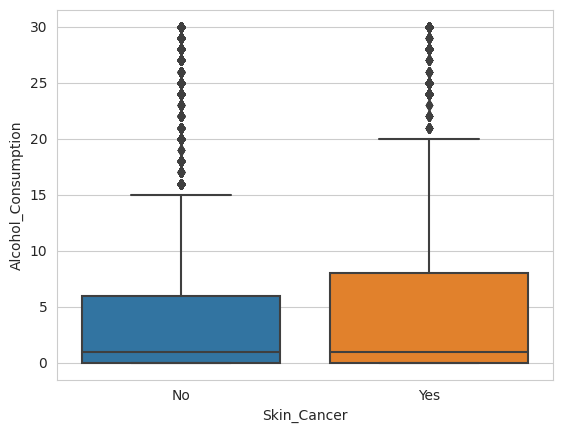

In [ ]:
sns.boxplot(x = df['Skin_Cancer'], y = df['Alcohol_Consumption'])

<Axes: xlabel='Skin_Cancer', ylabel='Fruit_Consumption'>

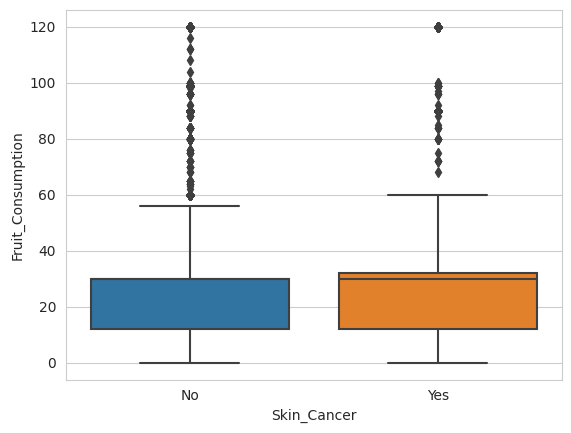

In [ ]:
sns.boxplot(x = df['Skin_Cancer'], y = df['Fruit_Consumption'])

<Axes: xlabel='Skin_Cancer', ylabel='Green_Vegetables_Consumption'>

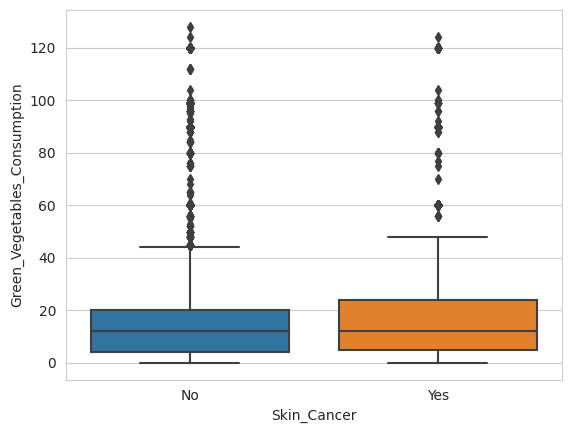

In [ ]:
sns.boxplot(x = df['Skin_Cancer'], y = df['Green_Vegetables_Consumption'])

<Axes: xlabel='Skin_Cancer', ylabel='FriedPotato_Consumption'>

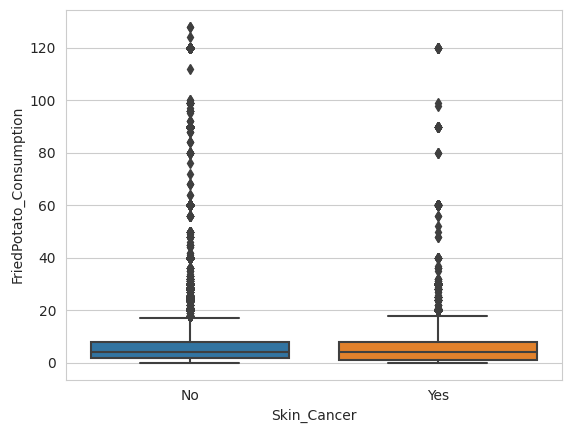

In [ ]:
sns.boxplot(x = df['Skin_Cancer'], y = df['FriedPotato_Consumption'])

<Axes: xlabel='Skin_Cancer', ylabel='count'>

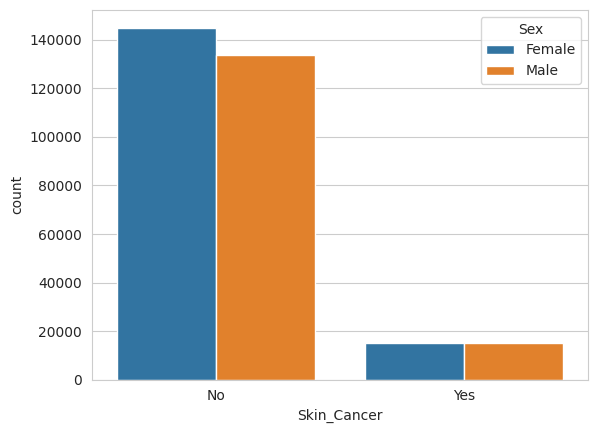

In [ ]:
sns.countplot(x = df['Skin_Cancer'], hue = df['Sex'])

<Axes: xlabel='Age_Category', ylabel='count'>

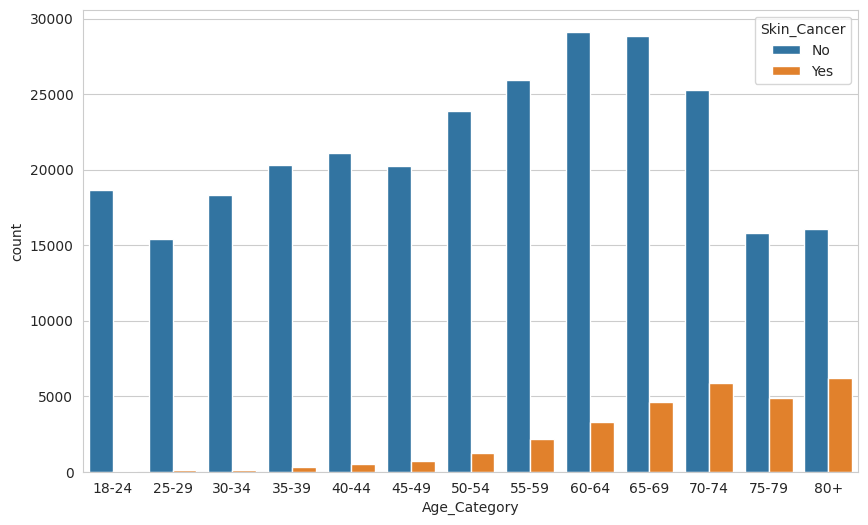

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x = df['Age_Category'].sort_values(), hue = df['Skin_Cancer'])

<Axes: xlabel='Smoking_History', ylabel='count'>

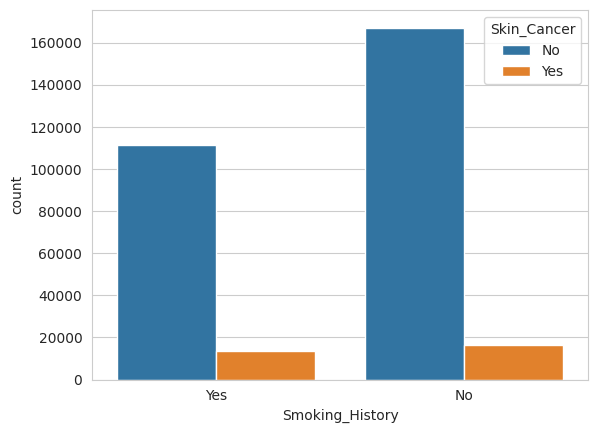

In [ ]:
sns.countplot(x = df['Smoking_History'], hue = df['Skin_Cancer'])

People who consume alcohol tend to have a higher chance of developing skin cancer than people who don't drink.

Fruit consumption is also a factor in Skin cancer, but it might be a case of allergy that turns into cancer.

People over the age of 50 have more Skin Cancer problems than young people.

Height, weight, BMI, smoking history, sex, and fried potato consumption do not give much insight about Skin Cancer.

<Axes: xlabel='Other_Cancer', ylabel='Height_(cm)'>

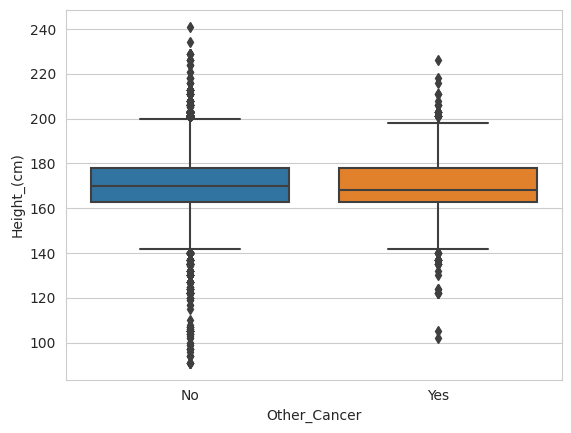

In [ ]:
sns.boxplot(x = df['Other_Cancer'], y = df['Height_(cm)'])

<Axes: xlabel='Other_Cancer', ylabel='Weight_(kg)'>

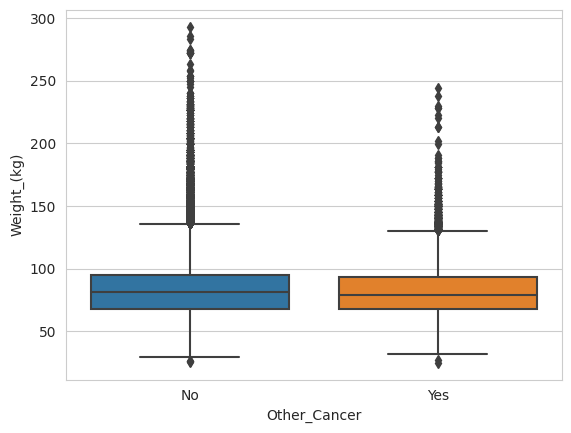

In [ ]:
sns.boxplot(x = df['Other_Cancer'], y = df['Weight_(kg)'])

<Axes: xlabel='Other_Cancer', ylabel='BMI'>

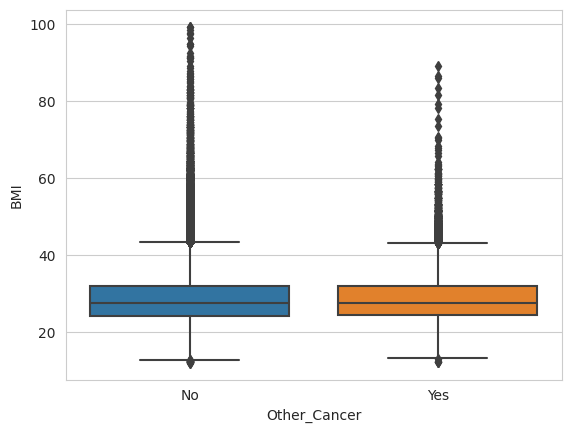

In [ ]:
sns.boxplot(x = df['Other_Cancer'], y = df['BMI'])

<Axes: xlabel='Other_Cancer', ylabel='Alcohol_Consumption'>

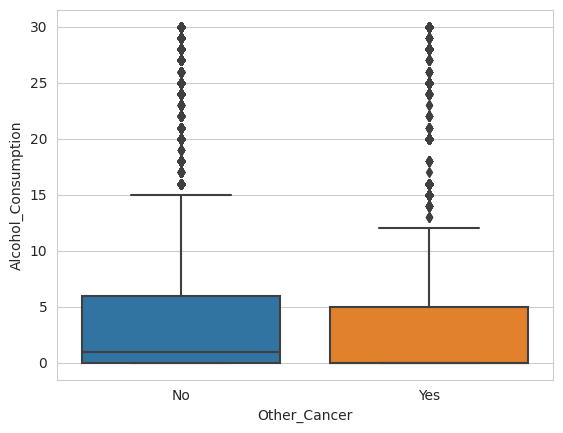

In [ ]:
sns.boxplot(x = df['Other_Cancer'], y = df['Alcohol_Consumption'])

<Axes: xlabel='Other_Cancer', ylabel='Fruit_Consumption'>

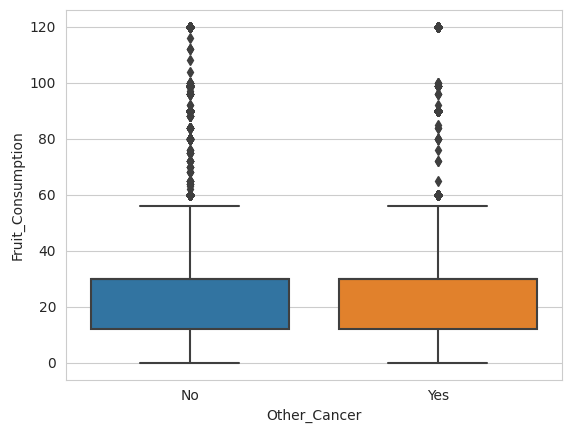

In [ ]:
sns.boxplot(x = df['Other_Cancer'], y = df['Fruit_Consumption'])

<Axes: xlabel='Other_Cancer', ylabel='Green_Vegetables_Consumption'>

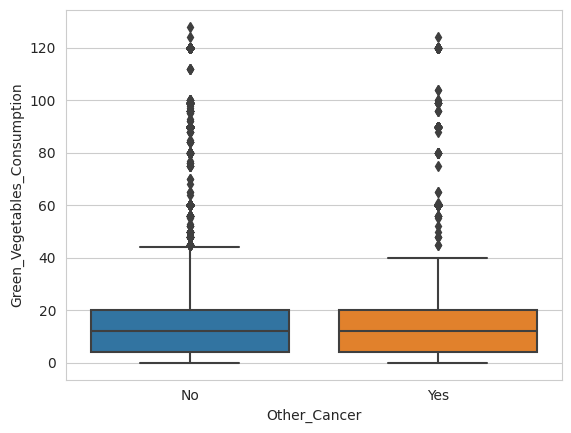

In [ ]:
sns.boxplot(x = df['Other_Cancer'], y = df['Green_Vegetables_Consumption'])

<Axes: xlabel='Other_Cancer', ylabel='FriedPotato_Consumption'>

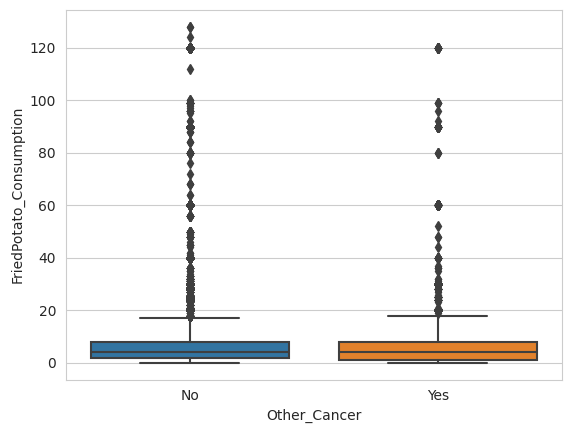

In [ ]:
sns.boxplot(x = df['Other_Cancer'], y = df['FriedPotato_Consumption'])

<Axes: xlabel='Other_Cancer', ylabel='count'>

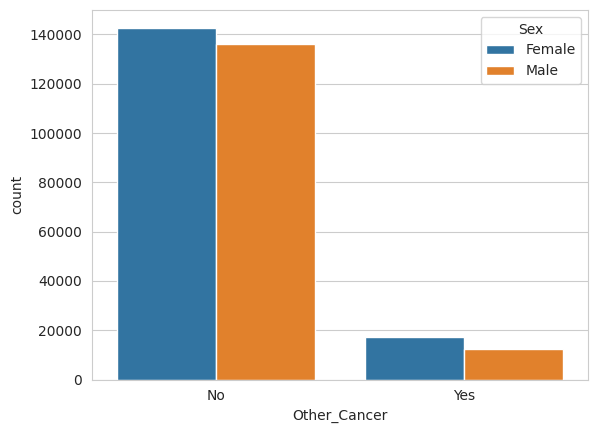

In [ ]:
sns.countplot(x = df['Other_Cancer'], hue = df['Sex'])

<Axes: xlabel='Age_Category', ylabel='count'>

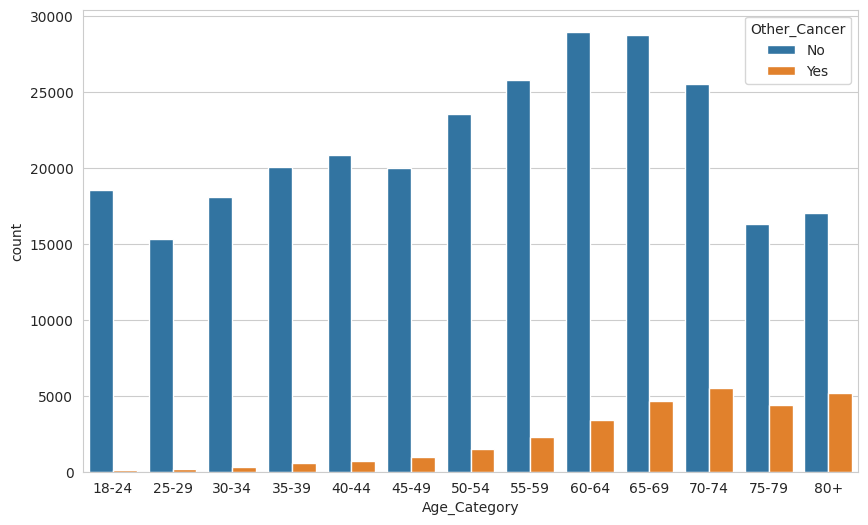

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x = df['Age_Category'].sort_values(), hue = df['Other_Cancer'])

<Axes: xlabel='Smoking_History', ylabel='count'>

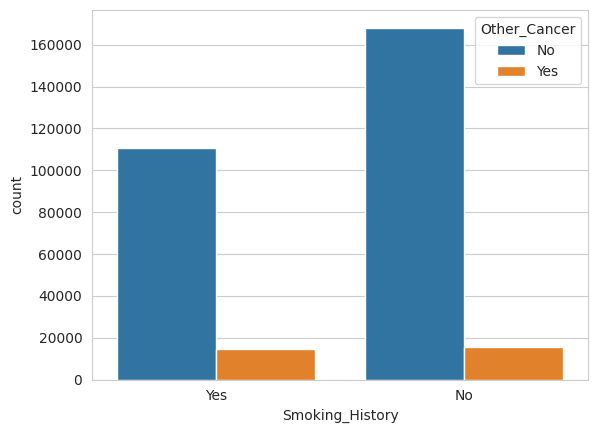

In [ ]:
sns.countplot(x = df['Smoking_History'], hue = df['Other_Cancer'])

The chart shows that people who drink alcohol do not face cancer compared to people who drink less.

Females are facing more types of cancer than males.

People 50 and older have other types of cancer.

The height, weight, BMI, Fruit consumption, fried potato consumption, and smoking history are not very insightful in respect of Other cancers.

<Axes: xlabel='Arthritis', ylabel='Height_(cm)'>

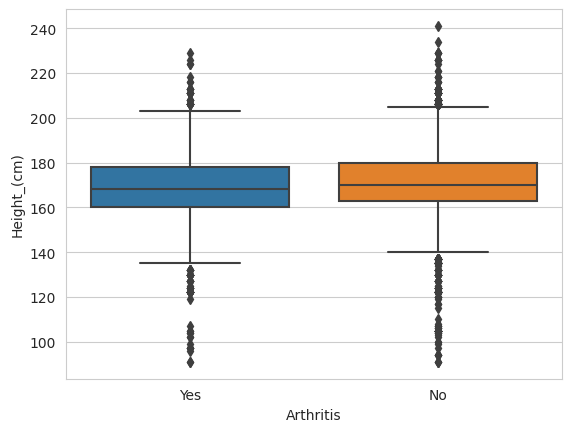

In [ ]:
sns.boxplot(x = df['Arthritis'], y = df['Height_(cm)'])

<Axes: xlabel='Arthritis', ylabel='Weight_(kg)'>

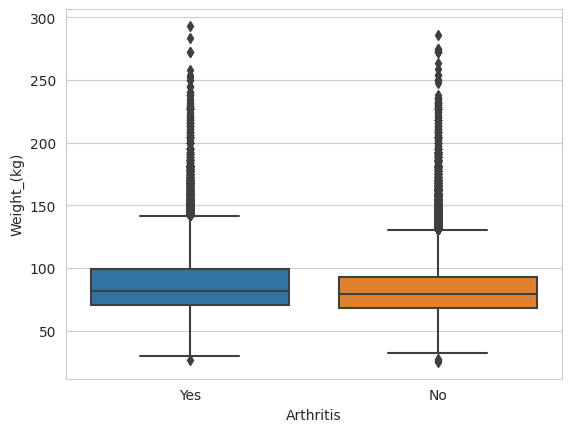

In [ ]:
sns.boxplot(x = df['Arthritis'], y = df['Weight_(kg)'])

<Axes: xlabel='Arthritis', ylabel='BMI'>

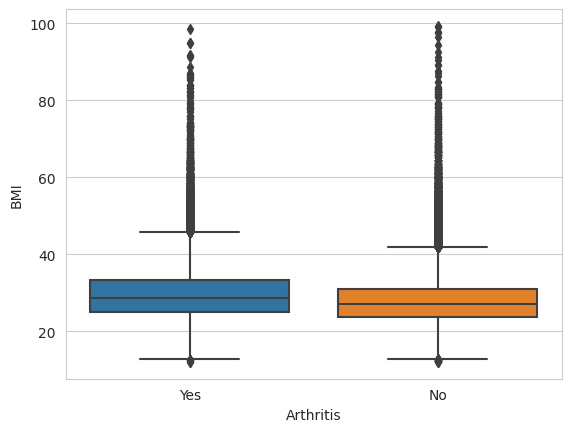

In [ ]:
sns.boxplot(x = df['Arthritis'], y = df['BMI'])

<Axes: xlabel='Arthritis', ylabel='Alcohol_Consumption'>

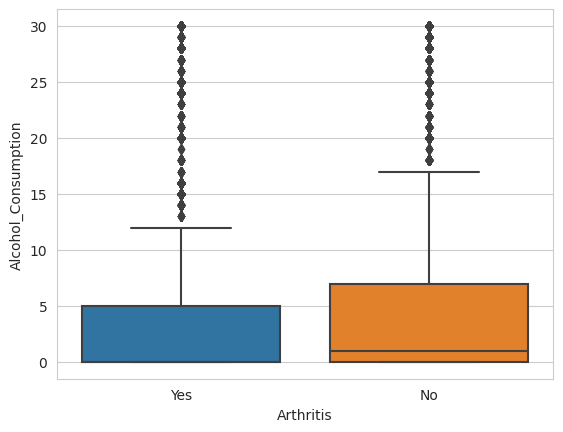

In [ ]:
sns.boxplot(x = df['Arthritis'], y = df['Alcohol_Consumption'])

<Axes: xlabel='Arthritis', ylabel='Fruit_Consumption'>

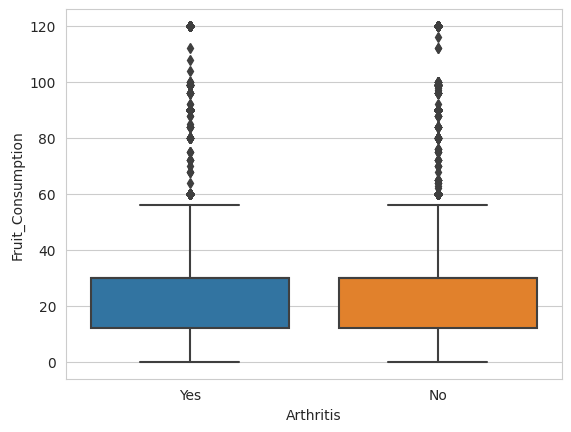

In [ ]:
sns.boxplot(x = df['Arthritis'], y = df['Fruit_Consumption'])

<Axes: xlabel='Arthritis', ylabel='Green_Vegetables_Consumption'>

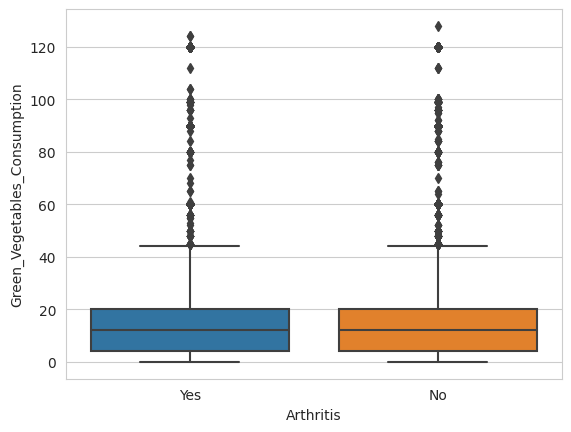

In [ ]:
sns.boxplot(x = df['Arthritis'], y = df['Green_Vegetables_Consumption'])

<Axes: xlabel='Arthritis', ylabel='FriedPotato_Consumption'>

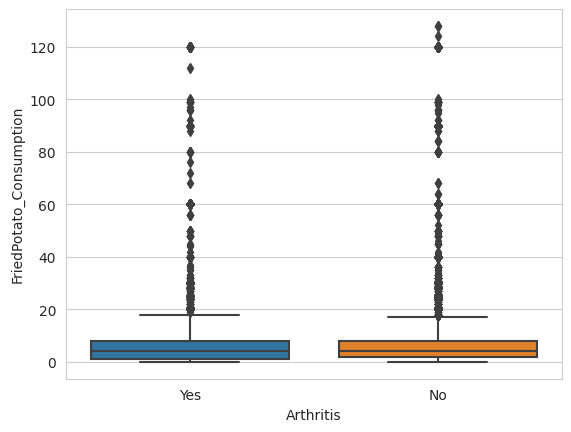

In [ ]:
sns.boxplot(x = df['Arthritis'], y = df['FriedPotato_Consumption'])

<Axes: xlabel='Arthritis', ylabel='count'>

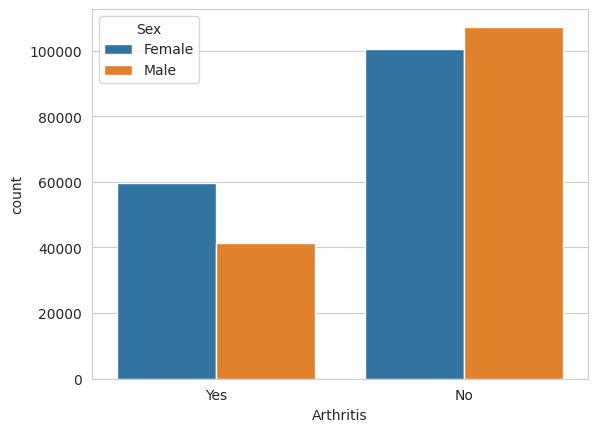

In [ ]:
sns.countplot(x = df['Arthritis'], hue = df['Sex'])

<Axes: xlabel='Age_Category', ylabel='count'>

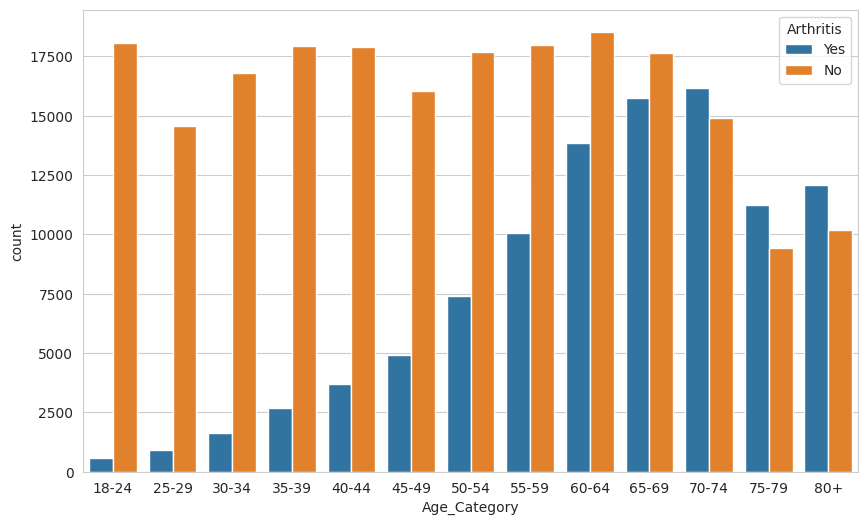

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Age_Category'].sort_values(), hue = df['Arthritis'])

<Axes: xlabel='Smoking_History', ylabel='count'>

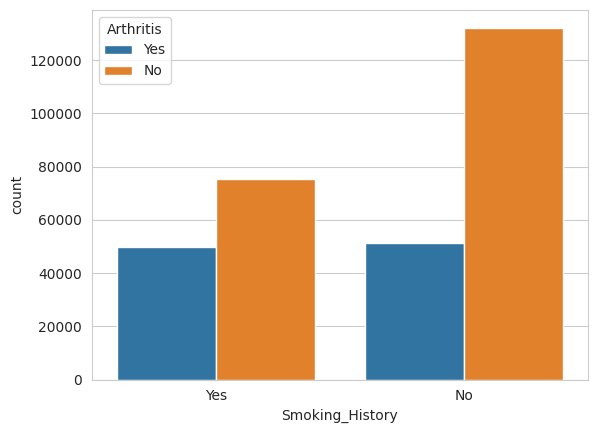

In [ ]:
sns.countplot(x = df['Smoking_History'], hue = df['Arthritis'])

People with more weight or a high BMI tend to have more Arthritis.

People with a high level of Alcohol Consumption have less Arthritis.

The more fried potatoes you eat, the less likely you are to develop arthritis.

Out of all people facing arthritis, 53% are female.

As people get older, more people develop arthritis.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'No'),
  Text(1, 0, 'Yes'),
  Text(2, 0, 'No, pre-diabetes or borderline diabetes'),
  Text(3, 0, 'Yes, but female told only during pregnancy')])

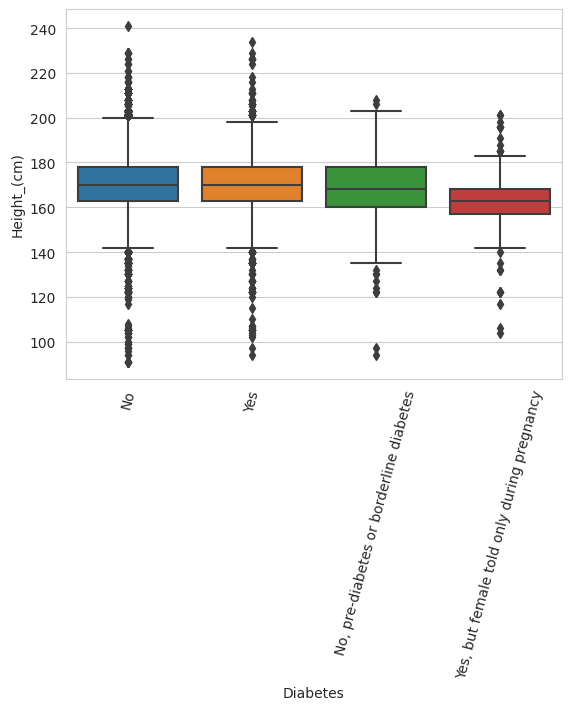

In [ ]:
sns.boxplot(x = df['Diabetes'], y = df['Height_(cm)'])
plt.xticks(rotation = 75)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'No'),
  Text(1, 0, 'Yes'),
  Text(2, 0, 'No, pre-diabetes or borderline diabetes'),
  Text(3, 0, 'Yes, but female told only during pregnancy')])

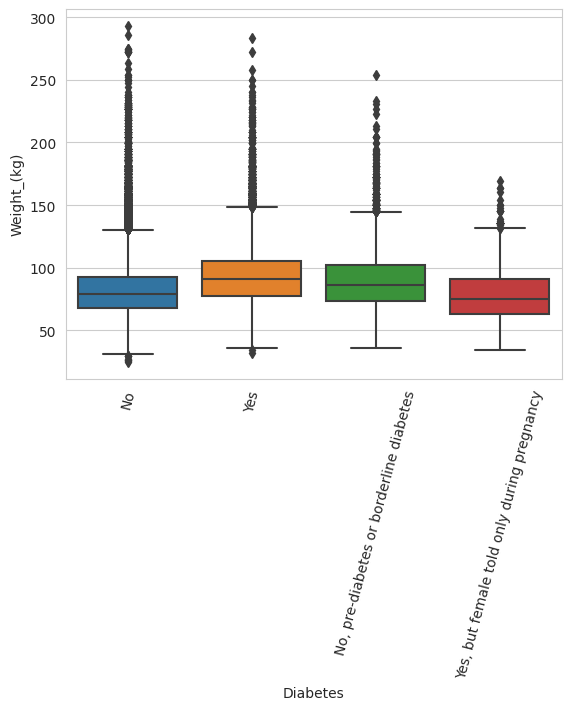

In [ ]:
sns.boxplot(x = df['Diabetes'], y = df['Weight_(kg)'])
plt.xticks(rotation = 75)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'No'),
  Text(1, 0, 'Yes'),
  Text(2, 0, 'No, pre-diabetes or borderline diabetes'),
  Text(3, 0, 'Yes, but female told only during pregnancy')])

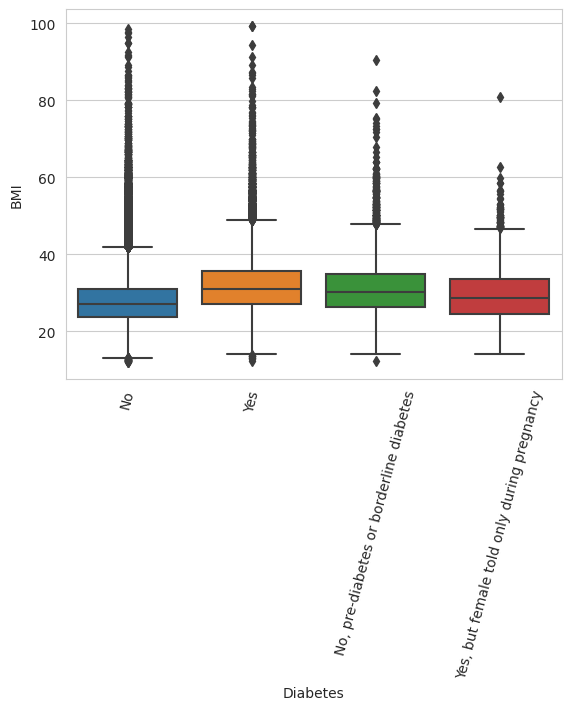

In [ ]:
sns.boxplot(x = df['Diabetes'], y = df['BMI'])
plt.xticks(rotation = 75)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'No'),
  Text(1, 0, 'Yes'),
  Text(2, 0, 'No, pre-diabetes or borderline diabetes'),
  Text(3, 0, 'Yes, but female told only during pregnancy')])

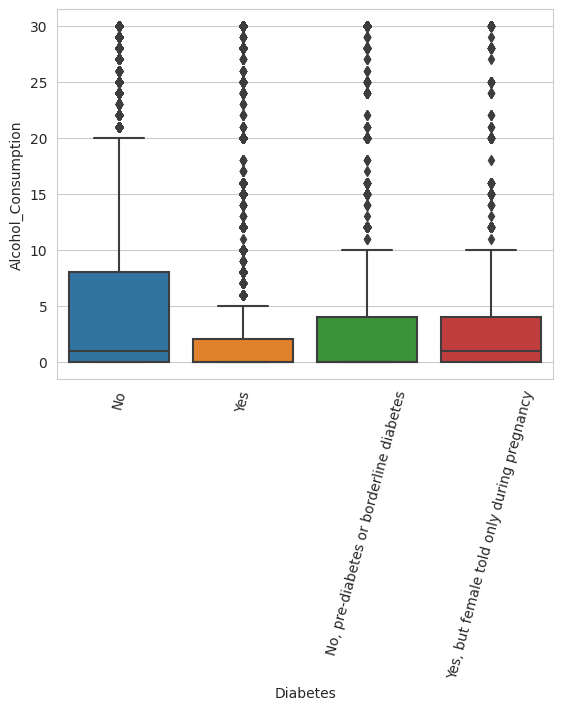

In [ ]:
sns.boxplot(x = df['Diabetes'], y = df['Alcohol_Consumption'])
plt.xticks(rotation = 75)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'No'),
  Text(1, 0, 'Yes'),
  Text(2, 0, 'No, pre-diabetes or borderline diabetes'),
  Text(3, 0, 'Yes, but female told only during pregnancy')])

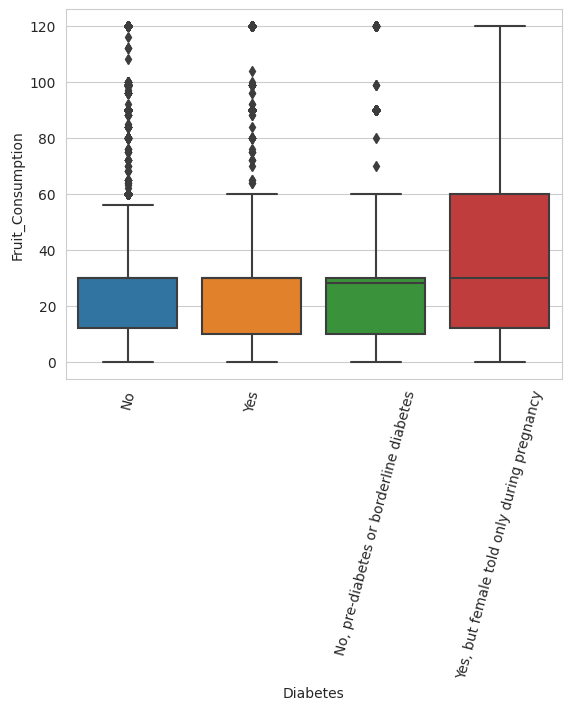

In [ ]:
sns.boxplot(x = df['Diabetes'], y = df['Fruit_Consumption'])
plt.xticks(rotation = 75)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'No'),
  Text(1, 0, 'Yes'),
  Text(2, 0, 'No, pre-diabetes or borderline diabetes'),
  Text(3, 0, 'Yes, but female told only during pregnancy')])

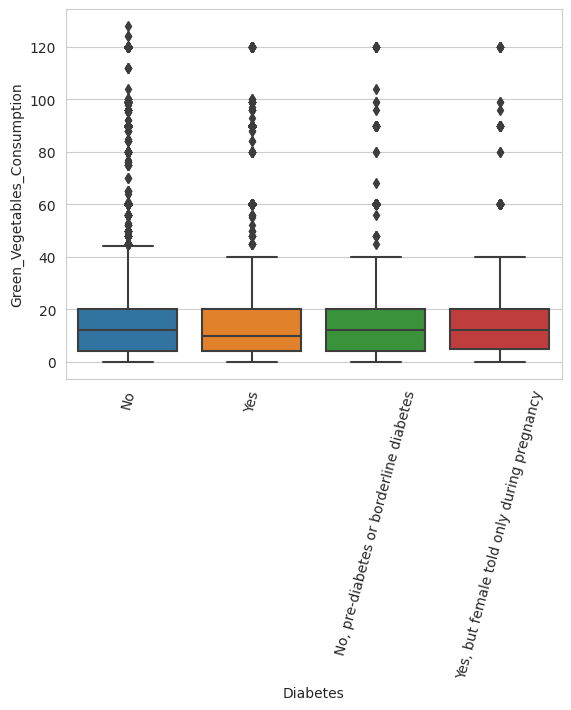

In [ ]:
sns.boxplot(x = df['Diabetes'], y = df['Green_Vegetables_Consumption'])
plt.xticks(rotation = 75)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'No'),
  Text(1, 0, 'Yes'),
  Text(2, 0, 'No, pre-diabetes or borderline diabetes'),
  Text(3, 0, 'Yes, but female told only during pregnancy')])

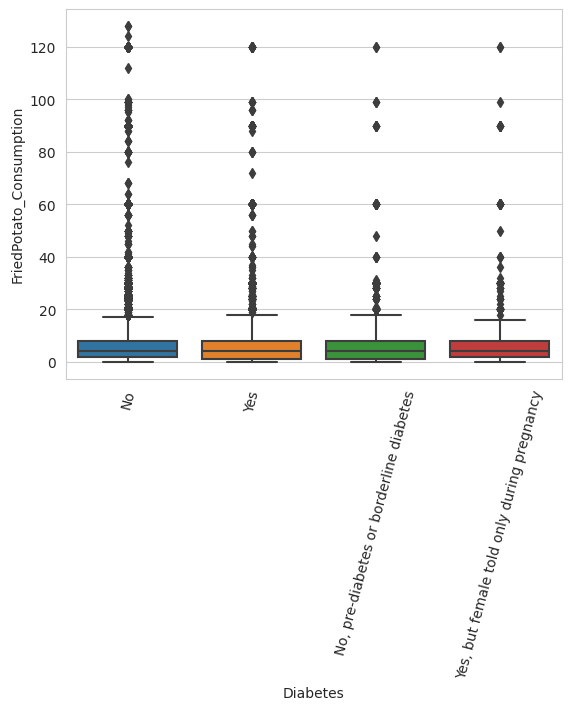

In [ ]:
sns.boxplot(x = df['Diabetes'], y = df['FriedPotato_Consumption'])
plt.xticks(rotation = 75)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'No'),
  Text(1, 0, 'Yes'),
  Text(2, 0, 'No, pre-diabetes or borderline diabetes'),
  Text(3, 0, 'Yes, but female told only during pregnancy')])

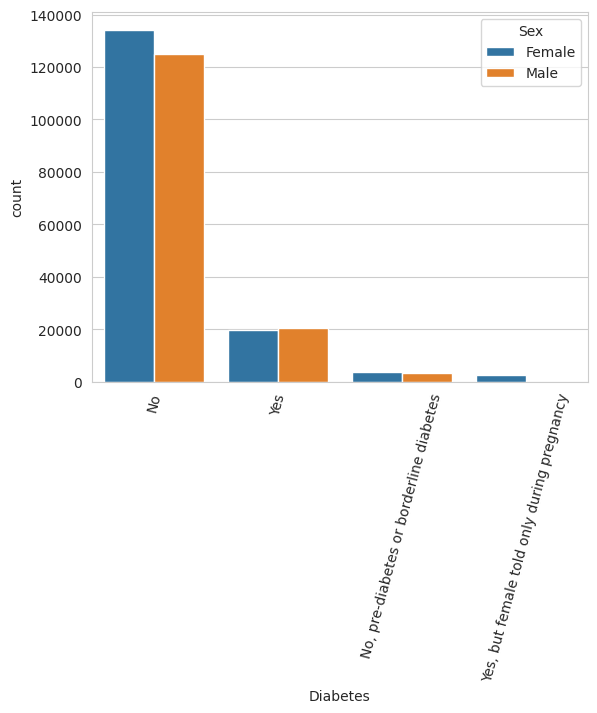

In [ ]:
sns.countplot(x = df['Diabetes'], hue = df['Sex'])
plt.xticks(rotation = 75)

<Axes: xlabel='Age_Category', ylabel='count'>

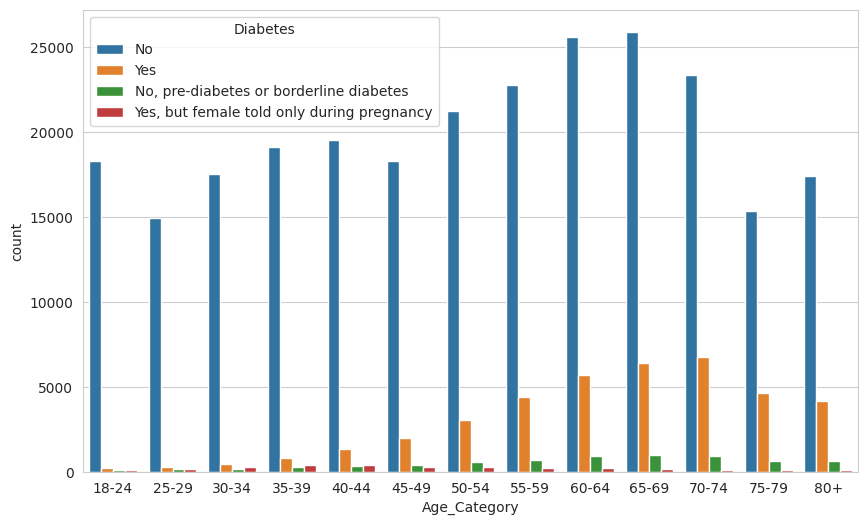

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x = df['Age_Category'].sort_values(), hue = df['Diabetes'])

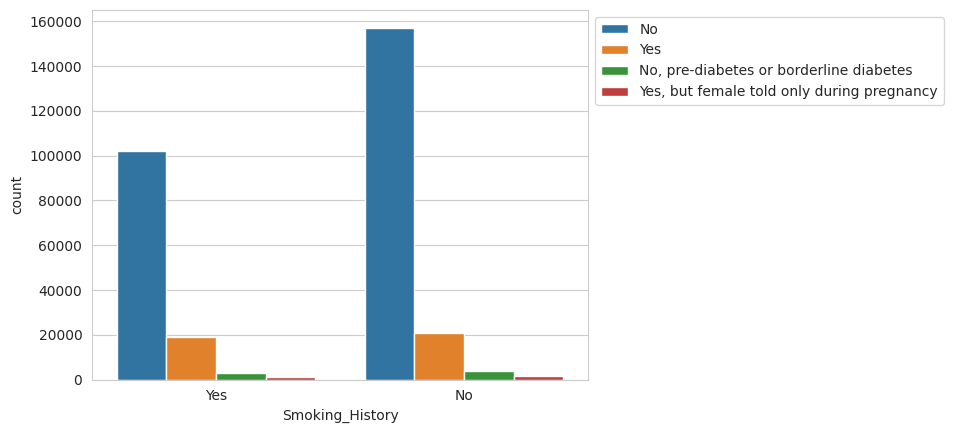

In [ ]:
sns.countplot(x = df['Smoking_History'], hue = df['Diabetes'])
plt.legend(bbox_to_anchor = (1, 1))

People with a high weight or BMI face diabetes issues more than others.

Fruit consumption causes diabetes issues, but only in females during pregnancy.

Diabetes issues grow as you age, after 50.



<Axes: xlabel='Depression', ylabel='Height_(cm)'>

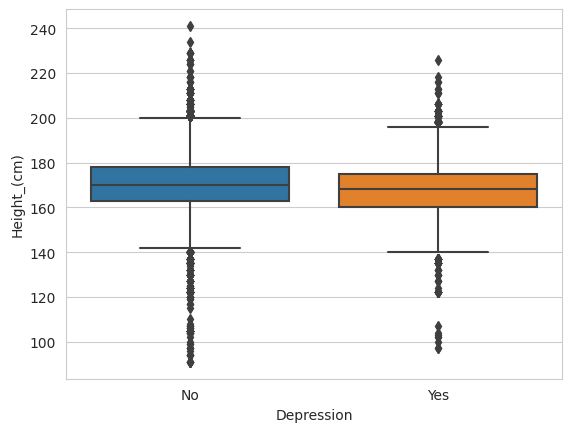

In [ ]:
sns.boxplot(x = df['Depression'], y = df['Height_(cm)'])

<Axes: xlabel='Depression', ylabel='Weight_(kg)'>

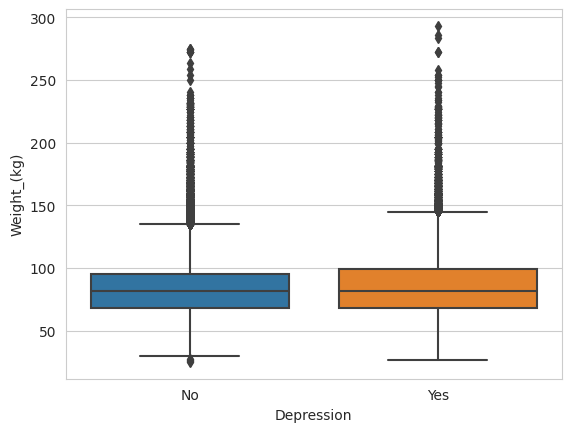

In [ ]:
sns.boxplot(x = df['Depression'], y = df['Weight_(kg)'])

<Axes: xlabel='Depression', ylabel='BMI'>

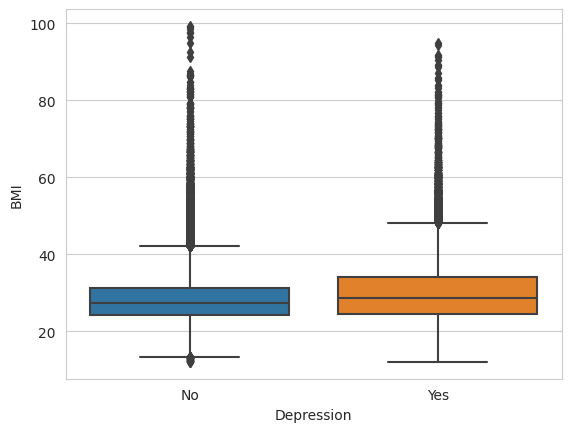

In [ ]:
sns.boxplot(x = df['Depression'], y = df['BMI'])

<Axes: xlabel='Depression', ylabel='Alcohol_Consumption'>

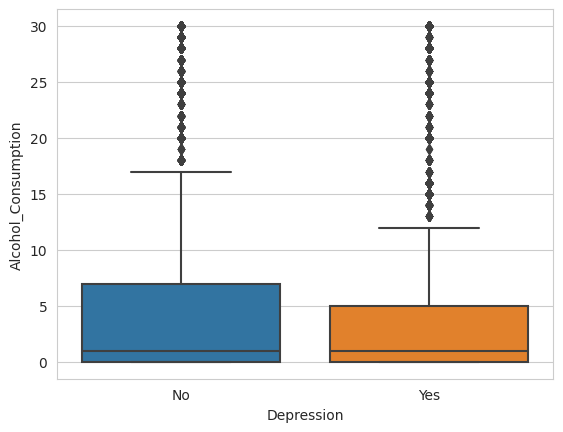

In [ ]:
sns.boxplot(x = df['Depression'], y = df['Alcohol_Consumption'])

<Axes: xlabel='Depression', ylabel='Fruit_Consumption'>

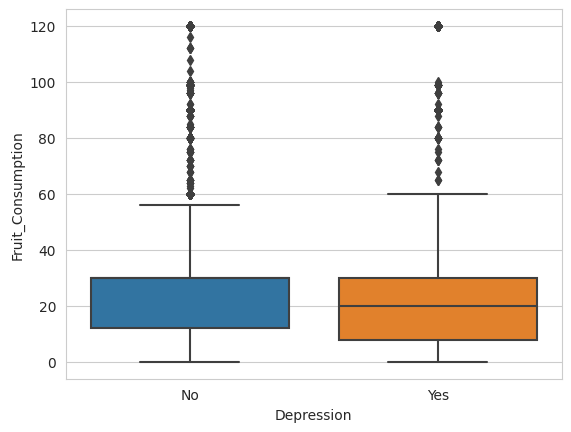

In [ ]:
sns.boxplot(x = df['Depression'], y = df['Fruit_Consumption'])

<Axes: xlabel='Depression', ylabel='Green_Vegetables_Consumption'>

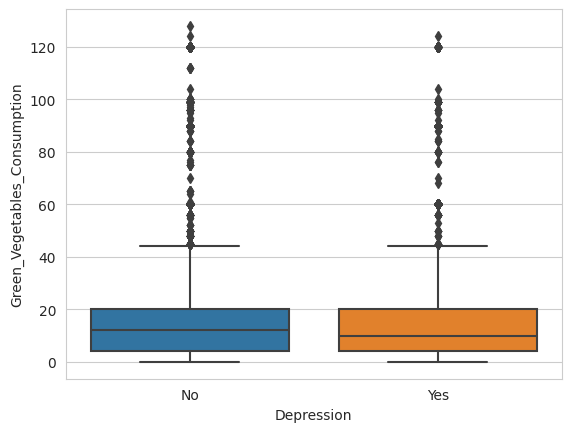

In [ ]:
sns.boxplot(x = df['Depression'], y = df['Green_Vegetables_Consumption'])

<Axes: xlabel='Depression', ylabel='FriedPotato_Consumption'>

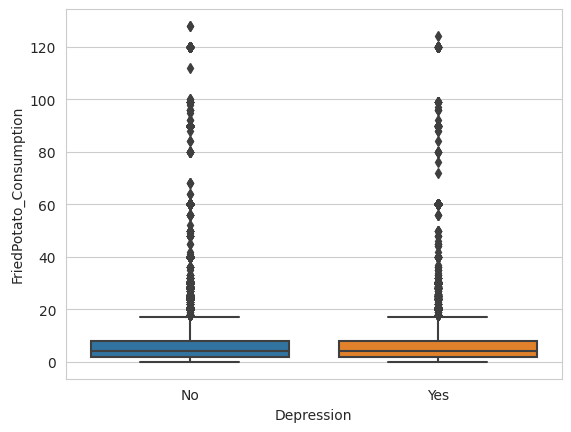

In [ ]:
sns.boxplot(x = df['Depression'], y = df['FriedPotato_Consumption'])

<Axes: xlabel='Depression', ylabel='count'>

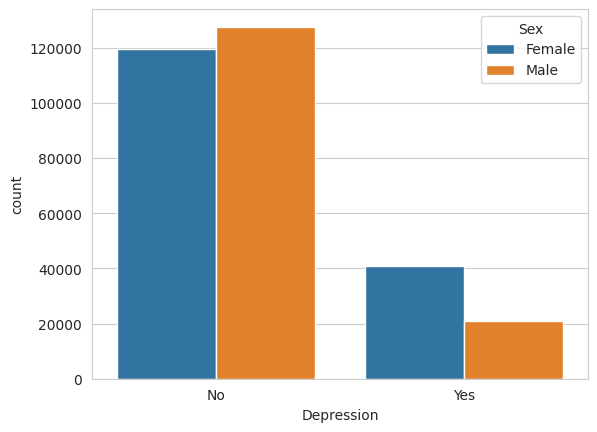

In [ ]:
sns.countplot(x = df['Depression'], hue = df['Sex'])

<Axes: xlabel='Age_Category', ylabel='count'>

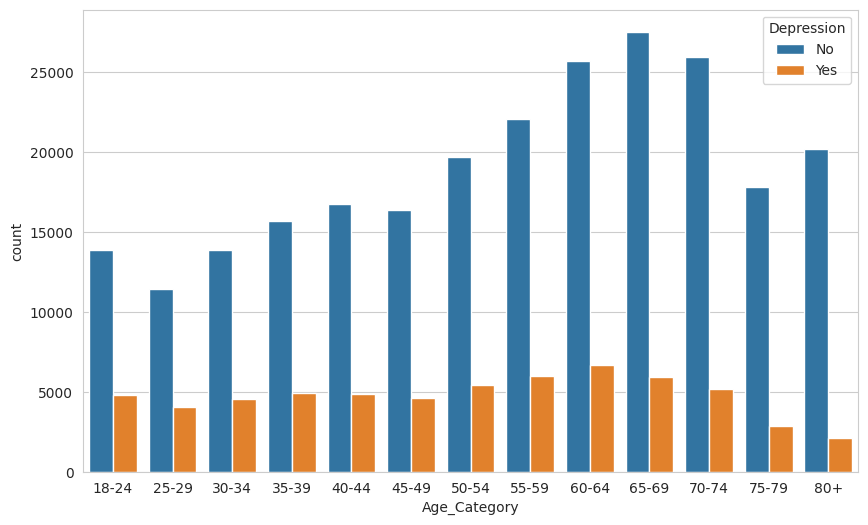

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x = df['Age_Category'].sort_values(), hue = df['Depression'])

<Axes: xlabel='Smoking_History', ylabel='count'>

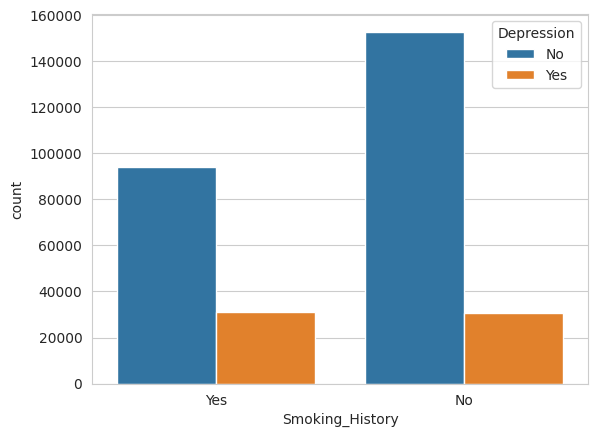

In [ ]:
sns.countplot(x = df['Smoking_History'], hue = df['Depression'])

A high BMI is a reason for depression.

People who drink alcohol have less depression than those who don't.

Females are the ones who are more depressed than males.

In all age groups, 7%-8% of the population is depressed.

<Axes: xlabel='Skin_Cancer', ylabel='count'>

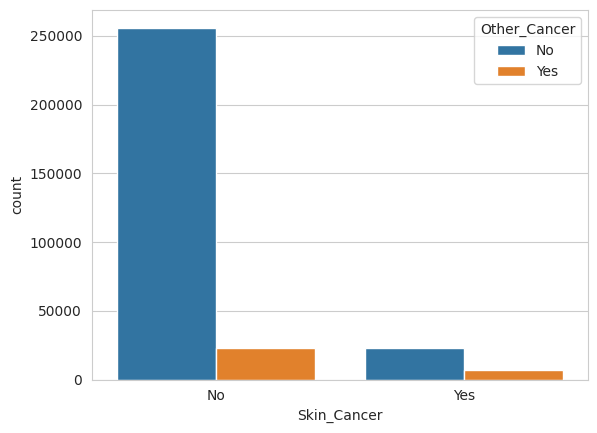

In [ ]:
sns.countplot(x = df['Skin_Cancer'], hue = df['Other_Cancer'])

There is no significant relationship between skin cancer and other types of cancer.

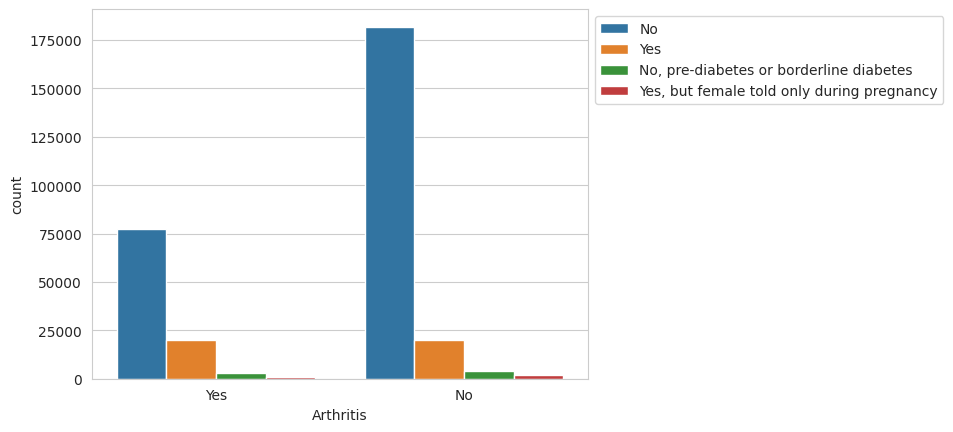

In [ ]:
sns.countplot(x = df['Arthritis'], hue = df['Diabetes'])
plt.legend(bbox_to_anchor = (1,1))

Arthritis and diabetes are not related in any peculiar way.

<Axes: xlabel='Depression', ylabel='count'>

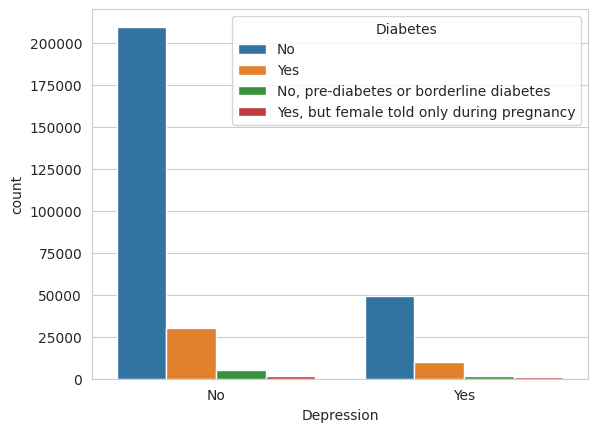

In [ ]:
sns.countplot(x = df['Depression'], hue = df['Diabetes'])

We thought that there might be any connection between diabetes and depression, but it is not present.

# Machine Learning

<Axes: >

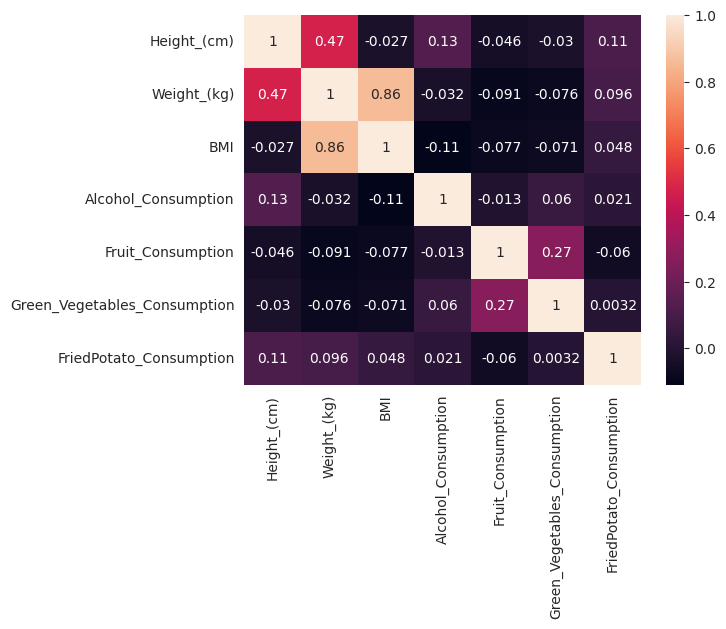

In [ ]:
sns.heatmap(df.corr(method = 'pearson'), annot = True)

In [ ]:
data= df.copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [ ]:
le = LabelEncoder()
for i in category:
    data[i] = le.fit_transform(data[i])

data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,2,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,2,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,2,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [ ]:
X = data.drop('Heart_Disease', axis = 'columns')
y = data['Heart_Disease']

In [ ]:
sm = SMOTE(random_state = 5)

In [ ]:
X_bal, y_bal = sm.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size = 0.3, random_state = 5)

## Logistic Regression


In [ ]:
log = LogisticRegression()

In [ ]:
log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
log_pred = log.predict(X_test)

log_pred_prob = log.predict_proba(X_test)

In [ ]:
print(confusion_matrix(y_test, log_pred))
print('\n')
print(classification_report(y_test, log_pred))
print('\n')
print(roc_auc_score(y_test, log_pred_prob[:,1]))

[[62657 22456]
 [21161 64056]]


              precision    recall  f1-score   support

           0       0.75      0.74      0.74     85113
           1       0.74      0.75      0.75     85217

    accuracy                           0.74    170330
   macro avg       0.74      0.74      0.74    170330
weighted avg       0.74      0.74      0.74    170330



0.8220057284311473


# KNN

In [ ]:
knn = KNeighborsClassifier(5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_pred = knn.predict(X_test)

knn_pred_prob = knn.predict_proba(X_test)

In [ ]:
print(confusion_matrix(y_test, knn_pred))
print('\n')
print(classification_report(y_test, knn_pred))
print('\n')
print(roc_auc_score(y_test, knn_pred_prob[:,1]))

[[59007 26106]
 [  422 84795]]


              precision    recall  f1-score   support

           0       0.99      0.69      0.82     85113
           1       0.76      1.00      0.86     85217

    accuracy                           0.84    170330
   macro avg       0.88      0.84      0.84    170330
weighted avg       0.88      0.84      0.84    170330



0.9428007289462124


# Random Forest

In [ ]:
rcf = RandomForestClassifier(n_estimators=150)

In [ ]:
rcf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [ ]:
rcf_pred = rcf.predict(X_test)

rcf_pred_prob = rcf.predict_proba(X_test)

In [ ]:
print(confusion_matrix(y_test, rcf_pred))
print('\n')
print(classification_report(y_test, rcf_pred))
print('\n')
print(roc_auc_score(y_test, rcf_pred_prob[:,1]))

[[78953  6160]
 [ 6229 78988]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93     85113
           1       0.93      0.93      0.93     85217

    accuracy                           0.93    170330
   macro avg       0.93      0.93      0.93    170330
weighted avg       0.93      0.93      0.93    170330



0.9808466409523603


# Decision Tree

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dtree_pred = dtree.predict(X_test)

dtree_pred_prob = dtree.predict_proba(X_test)

In [ ]:
print(confusion_matrix(y_test, dtree_pred))
print('\n')
print(classification_report(y_test, dtree_pred))
print('\n')
print(roc_auc_score(y_test, dtree_pred_prob[:,1]))

[[73555 11558]
 [ 8683 76534]]


              precision    recall  f1-score   support

           0       0.89      0.86      0.88     85113
           1       0.87      0.90      0.88     85217

    accuracy                           0.88    170330
   macro avg       0.88      0.88      0.88    170330
weighted avg       0.88      0.88      0.88    170330



0.8811633725802168


In [ ]:
etree = ExtraTreeClassifier()

In [ ]:
etree.fit(X_train, y_train)

ExtraTreeClassifier()

In [ ]:
etree_pred = etree.predict(X_test)

etree_pred_prob = etree.predict_proba(X_test)

In [ ]:
print(confusion_matrix(y_test, etree_pred))
print('\n')
print(classification_report(y_test, etree_pred))
print('\n')
print(roc_auc_score(y_test, etree_pred_prob[:,1]))

[[69569 15544]
 [10958 74259]]


              precision    recall  f1-score   support

           0       0.86      0.82      0.84     85113
           1       0.83      0.87      0.85     85217

    accuracy                           0.84    170330
   macro avg       0.85      0.84      0.84    170330
weighted avg       0.85      0.84      0.84    170330



0.8444025895180789


# Comparison

In [ ]:
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'Extra Decision Tree']
models = pd.DataFrame(models, columns = ['model'])

In [ ]:
models['accuracy'] = [accuracy_score(y_test, log_pred),
                      accuracy_score(y_test, knn_pred),
                      accuracy_score(y_test, rcf_pred),
                      accuracy_score(y_test, dtree_pred),
                      accuracy_score(y_test, etree_pred)]

In [ ]:
models['roc_auc_score'] = [roc_auc_score(y_test, log_pred_prob[:,1]),
                           roc_auc_score(y_test, knn_pred_prob[:,1]),
                           roc_auc_score(y_test, rcf_pred_prob[:,1]),
                           roc_auc_score(y_test, dtree_pred_prob[:,1]),
                           roc_auc_score(y_test, etree_pred_prob[:,1])]

In [ ]:
models

,model,accuracy,roc_auc_score
0,Logistic Regression,0.743926,0.822006
1,KNN,0.844255,0.942801
2,Random Forest,0.927265,0.980847
3,Decision Tree,0.881166,0.881163
4,Extra Decision Tree,0.844408,0.844403
